# Delivery Status Prediction Model

## Data Dictionary

| Feature Name | Explanation |
|---|---|
| OrderId | Unique ID of the Order placed by the customer |
| Customer_Id | ID of the Customer who placed the order |
| Customer_Category | Business Category to which the Customer Belongs to |
| Cust_State | State to which the customer belongs to |
| Zipcode | Zipcode of the customer location (Masked the identity of the zipcodes with random values) |
| Sales | Quantity of Sales per Customer at the time of order |
| Order_zone | Zone destination of the order |
| Price | Price of the Order Placed by the customer |
| CategoryName | Category Name of the Order |
| Transcation | Type of Transaction |
| Dept Id | Department ID to which the placed order belongs to |
| Dept_Name | Department Name to which the placed order belongs to |
| Profit_Ratio | Profit ratio of that order |
| Discount | Discount (in percentage) availed on that order |
| Quantity | Quantity of the order placed |
| Order_Profit | Profit received on the order |
| Product_type | Type of the Product Material |
| Prod_Category_Id | Category ID to which the Product belongs to |
| ProductLength | Length specification of the Product placed by the customer |
| ProductWeight | Weight specification of the Product placed by the customer |
| Dispatched | Whether dispatched on the same day of the order or not |
| Shipping Class | Class of the Shipping to which the order belongs |
| Scheduled_Shipping | For how many the shipping has been scheduled for (in days) |
| Warehouse_Region | Region of the Warehouse |
| Delivery Review | Delivery review of the order |
| Session_Ordered | Session in which the order has been placed |
| WeekdayOrder | Whether order placed on a weekday or not |
| Delivery_Status | Whether the order is ontime(0) or Delayed(1) |


| State Code | State Name |
|---|---|
| AR | Arunachal Pradesh |
| BR | Bihar |
| RJ | Rajasthan |
| UP | Uttar Pradesh |
| JK | Jammu and Kashmir |
| MA | Maharashtra |
| PB | Punjab |
| HR | Haryana |
| GJ | Gujarat |
| AP | Andhra Pradesh |
| KA | Karnataka |
| HP | Himachal Pradesh |
| OR | Odisha |
| KL | Kerala |
| WB | West Bengal |
| TEL | Telangana |
| UK | Uttarakhand |
| MP | Madhya Pradesh |

In [6]:
column_descriptions = ["Unique ID of the Order placed by the customer", "ID of the Customer who placed the order", "Business Category to which the Customer Belongs to", "State to which the customer belongs to", "Masked Zipcode of the customer location", "Quantity of Sales per Customer at the time of order", "Zone destination of the order", "Price of the Order Placed by the customer", "Category Name of the Order", "Type of Transaction", "Department ID to which the placed order belongs to", "Department Name to which the placed order belongs to", "Profit ratio of that order", "Discount (in percentage) availed on that order", "Quantity of the order placed", "Profit received on the order", "Type of the Product Material", "Category ID to which the Product belongs to", "Length specification of the Product placed by the customer", "Weight specification of the Product placed by the customer", "Whether dispatched on the same day of the order or not", "Class of the Shipping to which the order belongs", "For how many the shipping has been scheduled for (in days)", "Region of the Warehouse", "Delivery review of the order", "Session in which the order has been placed", "Whether order placed on a weekday or not", "Whether the order is ontime(0) or Delayed(1)"]

#### Importing necessary libraries

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm 
pd.set_option('display.max_columns',None)
np.set_printoptions(precision=8,suppress=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
plt.rcParams['figure.figsize'] = [15,8]
import statsmodels.api as sm
from scipy import stats
from category_encoders import CatBoostEncoder
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier

#### Loading the file

In [8]:
df=pd.read_csv('Train_Set.csv')

#### Shape

In [9]:
df.shape

(126363, 28)

The dataset contains 126,363 entries and 28 columns, with a mix of numeric and categorical data.

#### Displaying first 5 records of the dataset

In [10]:
df.head()

OrderId  Customer_Id Customer_Category Cust_State  Zipcode  Sales  \
0  2477882        12386          Consumer         AR    19120  150.0   
1  2477895         2630          Consumer         BR     2907  165.0   
2  2473260         1752         Corporate         RJ    90214  171.0   
3  2466916         9268          Consumer         UP      745  132.0   
4  2351480         2888         Corporate         UP    92427    NaN   

  Order_zone    Price CategoryName Transcation  Dept_Id Dept_Name  \
0    Central  4383.39        Cat-2         UPI        4   Apparel   
1       East  4295.72        Cat-2         UPI        4   Apparel   
2      South  3616.65       Cat-50        Cash        7  Fan Shop   
3       East  9175.86       Cat-12      Credit        4   Apparel   
4      North  2779.29        Cat-3         UPI        5      Golf   

   Profit_Ratio  Discount  Quantity  Order_Profit  Product_type  \
0          0.08      0.10         3         352.78      Fragile   
1          0.47      0.16         3        2018.10      Fragile   
2          0.26      0.07         4         939.63  Not Fragile   
3          0.48      0.18         1        4401.74  Not Fragile   
4          0.13      0.16         4         361.70  Not Fragile   

   Prod_Category_Id  ProductLength  ProductWeight  Dispatched Shipping_Class  \
0                17          191.0         1592.0           0       Standard   
1                17           79.0         1420.0           0       Standard   
2                46           67.0         1231.0           0       Standard   
3                18           45.0            NaN           1             2A   
4                29           43.0         1018.0           1       Standard   

   Scheduled_Shipping Warehouse_Region  Delivery_Review  Session_Ordered  \
0                   4            NORTH              5.0              2.0   
1                   6            NORTH              2.0              2.0   
2                   6            SOUTH              4.0              2.0   
3                   4            NORTH              4.0              3.0   
4                   5          CENTRAL              2.0              1.0   

   WeekdayOrder  Delivery_Status  
0             0                0  
1             1                0  
2             0                1  
3             1                1  
4             0                1

In [11]:
df['Delivery_Status'].value_counts(normalize=1)

Delivery_Status
0    0.671969
1    0.328031
Name: proportion, dtype: float64

#### Features

In [12]:
print(df.columns.to_frame(index=False, name='Columns'))

               Columns
0              OrderId
1          Customer_Id
2    Customer_Category
3           Cust_State
4              Zipcode
5                Sales
6           Order_zone
7                Price
8         CategoryName
9          Transcation
10             Dept_Id
11           Dept_Name
12        Profit_Ratio
13            Discount
14            Quantity
15       Order_Profit 
16        Product_type
17    Prod_Category_Id
18       ProductLength
19       ProductWeight
20          Dispatched
21      Shipping_Class
22  Scheduled_Shipping
23    Warehouse_Region
24     Delivery_Review
25     Session_Ordered
26        WeekdayOrder
27     Delivery_Status


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OrderId             126363 non-null  int64  
 1   Customer_Id         126363 non-null  int64  
 2   Customer_Category   126363 non-null  object 
 3   Cust_State          126363 non-null  object 
 4   Zipcode             126363 non-null  int64  
 5   Sales               122749 non-null  float64
 6   Order_zone          126363 non-null  object 
 7   Price               126363 non-null  float64
 8   CategoryName        126363 non-null  object 
 9   Transcation         126363 non-null  object 
 10  Dept_Id             126363 non-null  int64  
 11  Dept_Name           126363 non-null  object 
 12  Profit_Ratio        126363 non-null  float64
 13  Discount            121313 non-null  float64
 14  Quantity            126363 non-null  int64  
 15  Order_Profit        126363 non-nul

In [14]:
x=0
for i,j in zip(df.columns,column_descriptions):
    x+=1
    print(x,i)
    print(j)
    print(df[i].nunique())
    print(df[i].unique())
    print('*'*80)

1 OrderId
Unique ID of the Order placed by the customer
126363
[2477882 2477895 2473260 ... 2512265 2464424 2415728]
********************************************************************************
2 Customer_Id
ID of the Customer who placed the order
16707
[12386  2630  1752 ... 18579 15796 16915]
********************************************************************************
3 Customer_Category
Business Category to which the Customer Belongs to
3
['Consumer' 'Corporate' 'others']
********************************************************************************
4 Cust_State
State to which the customer belongs to
18
['AR' 'BR' 'RJ' 'UP' 'JK' 'MA' 'PB' 'HR' 'GJ' 'AP' 'KA' 'HP' 'OR' 'KL'
 'WB' 'TEL' 'UK' 'MP']
********************************************************************************
5 Zipcode
Masked Zipcode of the customer location
6713
[19120  2907 90214 ... 43071 85018 11729]
********************************************************************************
6 Sales
Quantity of Sal

113156
[ 352.78 2018.1   939.63 ...  866.27 4479.18 6794.25]
********************************************************************************
17 Product_type
Type of the Product Material
2
['Fragile' 'Not Fragile']
********************************************************************************
18 Prod_Category_Id
Category ID to which the Product belongs to
51
[17 46 18 29 35 43 45 24 68 67 48 26 72 11  9 13  3 32 37 30 40 36  7 33
 41 76  5 71 62 38 75 12 69 59 64 63 60 44  6 74 73 70  2 65 10 66 31 16
 61  4 34]
********************************************************************************
19 ProductLength
Length specification of the Product placed by the customer
201
[191.  79.  67.  45.  43.  48. 195. 173. 104.  30.  28.  94.  44.  14.
  16.  85. 192. 108. 208.  92. 119.  58.  53. 166. 180. 124.  75. 138.
 154.  88. 167. 179.  21.  31. 178. 182.  63.  27. 204. 136.  38. 127.
  19.  40. 116. 137.  33. 118. 103. 199.  15. 141.  66.  54. 125.  32.
 155. 111. 194. 129.  71.  62.  83.

###### No duplicates in the dataset

In [15]:
df.nunique().sort_values(ascending=False)

OrderId               126363
Order_Profit          113156
Price                  96721
Customer_Id            16707
ProductWeight          14387
Zipcode                 6713
Sales                    760
ProductLength            201
Profit_Ratio             134
Prod_Category_Id          51
CategoryName              50
Cust_State                18
Discount                  16
Dept_Id                   11
Dept_Name                 11
Scheduled_Shipping         6
Warehouse_Region           5
Delivery_Review            5
Quantity                   5
Order_zone                 5
Shipping_Class             4
Transcation                4
Customer_Category          3
Session_Ordered            3
Product_type               2
Dispatched                 2
WeekdayOrder               2
Delivery_Status            2
dtype: int64

## Non contributing features

In [16]:
df1=df.copy()

Reasons for feature removal:

- **Order ID, Customer ID, and Product Category ID**: These are unique identifiers for each order or item, so they don’t add any predictive value to the model.
- **Zipcode**: Due to masking, it lacks enough detail for effective analysis and modeling.
- **Dept ID**: It duplicates information already provided by Dept Name, making it redundant to retain both fields.

In [17]:
df1=df1.drop(['OrderId','Zipcode','Dept_Id','Customer_Id','Prod_Category_Id'],axis=1)

## Datatypes

In [18]:
df1.select_dtypes(include='object').columns.to_frame(index=False,name='Categorical columns')

Categorical columns
0   Customer_Category
1          Cust_State
2          Order_zone
3        CategoryName
4         Transcation
5           Dept_Name
6        Product_type
7      Shipping_Class
8    Warehouse_Region

In [19]:
df1.select_dtypes(include=np.number).columns.to_frame(index=False,name='Numerical columns')

Numerical columns
0                Sales
1                Price
2         Profit_Ratio
3             Discount
4             Quantity
5        Order_Profit 
6        ProductLength
7        ProductWeight
8           Dispatched
9   Scheduled_Shipping
10     Delivery_Review
11     Session_Ordered
12        WeekdayOrder
13     Delivery_Status

In [20]:
df1['Quantity']=df1['Quantity'].astype('object')
df1['Dispatched']=df1['Dispatched'].astype('object')
df1['Scheduled_Shipping']=df1['Scheduled_Shipping'].astype('object')
df1['Delivery_Review']=df1['Delivery_Review'].astype('object')
df1['WeekdayOrder']=df1['WeekdayOrder'].astype('object')
df1['Session_Ordered']=df1['Session_Ordered'].astype('object')
df1['Delivery_Status']=df1['Delivery_Status'].astype('object')

In [21]:
df1.select_dtypes(include='object').columns.to_frame(index=False,name='Categorical columns')

Categorical columns
0    Customer_Category
1           Cust_State
2           Order_zone
3         CategoryName
4          Transcation
5            Dept_Name
6             Quantity
7         Product_type
8           Dispatched
9       Shipping_Class
10  Scheduled_Shipping
11    Warehouse_Region
12     Delivery_Review
13     Session_Ordered
14        WeekdayOrder
15     Delivery_Status

In [22]:
df1.select_dtypes(include=np.number).columns.to_frame(index=False,name='Numerical columns')

Numerical columns
0             Sales
1             Price
2      Profit_Ratio
3          Discount
4     Order_Profit 
5     ProductLength
6     ProductWeight

In [318]:
num=df1.select_dtypes(include=np.number).columns.to_list()

In [319]:
cat=df1.select_dtypes(include='object').columns.to_list()

## Null values

In [25]:
null_val=df1.isnull().sum()/len(df1)*100
null_val

Customer_Category     0.000000
Cust_State            0.000000
Sales                 2.860014
Order_zone            0.000000
Price                 0.000000
CategoryName          0.000000
Transcation           0.000000
Dept_Name             0.000000
Profit_Ratio          0.000000
Discount              3.996423
Quantity              0.000000
Order_Profit          0.000000
Product_type          0.000000
ProductLength         2.331379
ProductWeight         0.550003
Dispatched            0.000000
Shipping_Class        0.000000
Scheduled_Shipping    0.000000
Warehouse_Region      0.000000
Delivery_Review       7.173777
Session_Ordered       3.792249
WeekdayOrder          0.000000
Delivery_Status       0.000000
dtype: float64

In [26]:
null_val[null_val>0]

Sales              2.860014
Discount           3.996423
ProductLength      2.331379
ProductWeight      0.550003
Delivery_Review    7.173777
Session_Ordered    3.792249
dtype: float64

In [27]:
df1[null_val[null_val>0].index.to_list()].skew()

Sales              2.741269
Discount           0.280478
ProductLength       0.43551
ProductWeight      3.563008
Delivery_Review   -0.156204
Session_Ordered   -0.002744
dtype: object

In [28]:
df1['Sales'].fillna(df1['Sales'].median(),inplace=True)

In [29]:
df1['Discount'].fillna(df1['Discount'].mean(),inplace=True)

In [30]:
df1['ProductLength'].fillna(df1['ProductLength'].mean(),inplace=True)

In [31]:
df1['ProductWeight'].fillna(df1['ProductWeight'].median(),inplace=True)

In [32]:
df1['Delivery_Review'].fillna(df1['Delivery_Review'].mode()[0],inplace=True)

In [33]:
df1['Session_Ordered'].fillna(df1['Session_Ordered'].mode()[0],inplace=True)

In [34]:
df1.isnull().sum().sum()

0

### Null Value Imputation Strategy:

- **Numerical Features**: 
   - For numerical data that is **approximately normally distributed**, missing values are imputed using the **mean**. This preserves the overall distribution of the data.
   - For **skewed numerical data**, missing values are imputed with the **median**, which is less affected by outliers and better represents the central tendency of skewed distributions.

- **Categorical Features**: 
   - For categorical data, missing values are imputed with the **mode** (the most frequent category). This approach helps maintain the original distribution of categories and is effective when certain values occur more frequently than others.

This imputation strategy ensures that missing values are handled in a way that aligns with the underlying data characteristics, improving the model's stability and performance.

## Coorelation

In [35]:
df_corr=df1.copy()

In [36]:
df_corr['Delivery_Status']=df_corr['Delivery_Status'].astype('int')

In [37]:
corr_var=df_corr.select_dtypes(include=np.number).columns.to_list()

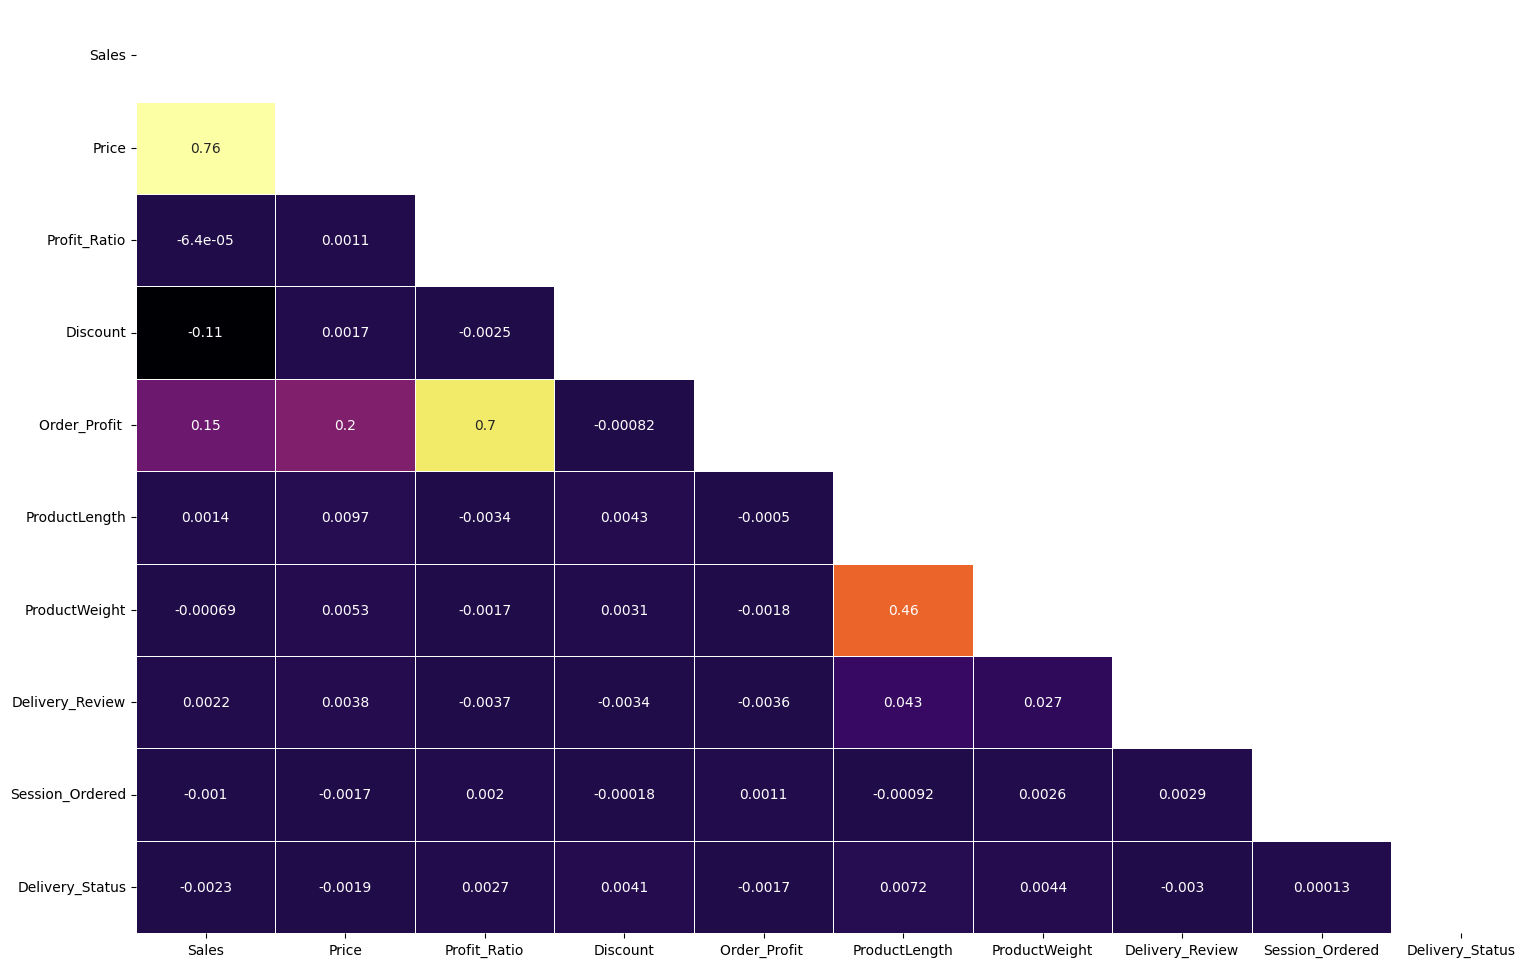

In [38]:
plt.rcParams['figure.figsize'] = [18,12]
sns.heatmap(df_corr[corr_var].corr(),annot=True,cmap='inferno',cbar=False,mask=np.triu(df_corr[corr_var].corr()),linewidths=0.5)    
plt.show();

## Summary Statistics of the Dataset

In [39]:
df1[num].describe()

Sales          Price   Profit_Ratio       Discount  \
count  126363.000000  126363.000000  126363.000000  126363.000000   
mean      195.458718   10064.758724       0.124273       0.105450   
std       119.761379    9923.788862       0.467546       0.070869   
min        28.000000     617.310000      -2.750000       0.000000   
25%       114.000000    3587.760000       0.080000       0.040000   
50%       173.000000    4415.280000       0.280000       0.105450   
75%       257.000000   14222.400000       0.370000       0.160000   
max      1969.000000  142151.340000       0.500000       0.250000   

       Order_Profit   ProductLength  ProductWeight  
count  126363.000000  126363.000000  126363.000000  
mean     1257.016748      95.976178    3736.038405  
std      6690.787375      54.713277    7600.452160  
min   -271606.420000      10.000000      10.000000  
25%       314.080000      52.000000     764.000000  
50%      1258.740000      85.000000    1640.000000  
75%      3119.900000     139.000000    2706.000000  
max     68156.670000     210.000000   43999.000000

In [40]:
df1[cat].describe(include='object')

Customer_Category Cust_State Order_zone CategoryName Transcation  \
count             126363     126363     126363       126363      126363   
unique                 3         18          5           50           4   
top             Consumer         AR      North        Cat-2       Debit   
freq               65464       7105      25375        17297       48586   

       Dept_Name  Quantity Product_type  Dispatched Shipping_Class  \
count     126363    126363       126363      126363         126363   
unique        11         5            2           2              4   
top     Fan Shop         1  Not Fragile           0       Standard   
freq       46834     69417        71204       76543          75433   

        Scheduled_Shipping Warehouse_Region  WeekdayOrder  Delivery_Status  
count               126363           126363        126363           126363  
unique                   6                5             2                2  
top                      4            NORTH             0                0  
freq                 30256            36043         63444            84912

## Data analysis and visualisation 

In [320]:
len(num)

9

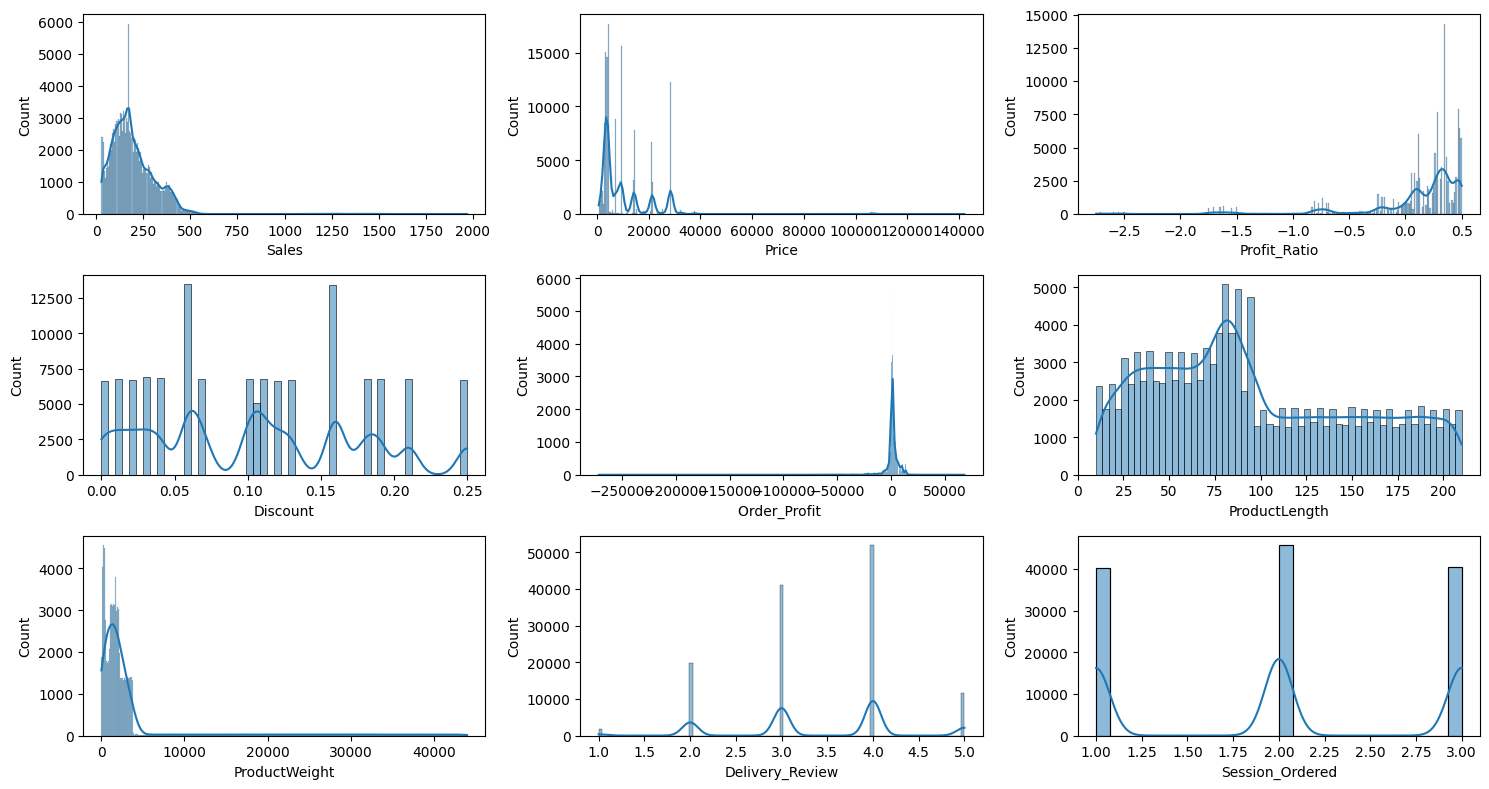

In [322]:
t=1
for i in num:
    plt.subplot(3,3,t)
    sns.histplot(df1[i],kde=True)
    t+=1
plt.tight_layout()
plt.show()

In [41]:
df1.nunique().sort_values(ascending=0)

Order_Profit          113156
Price                  96721
ProductWeight          14387
Sales                    760
ProductLength            202
Profit_Ratio             134
CategoryName              50
Cust_State                18
Discount                  17
Dept_Name                 11
Scheduled_Shipping         6
Warehouse_Region           5
Quantity                   5
Order_zone                 5
Delivery_Review            5
Transcation                4
Shipping_Class             4
Session_Ordered            3
Customer_Category          3
Dispatched                 2
Product_type               2
WeekdayOrder               2
Delivery_Status            2
dtype: int64

In [42]:
print('Range')
print()
for i in num:
    print(i)
    print(df[i].max()-df[i].min())
    print()

Range

Sales
1941.0

Price
141534.03

Profit_Ratio
3.25

Discount
0.25

Order_Profit 
339763.08999999997

ProductLength
200.0

ProductWeight
43989.0



In [43]:
df_dummy =df1.copy()

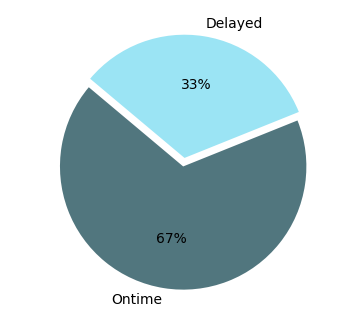

In [44]:
plt.figure(figsize=(5, 4))
df1['Delivery_Status'].value_counts().plot(kind='pie',colors = ['#51767e', '#9be4f4'], autopct='%1.0f%%', explode=(0.02, 0.05),
    startangle=140, ylabel=' ', labels = ['Ontime', 'Delayed'])
plt.show()

In [45]:
for i in range(0, len(df_dummy)):
    if df_dummy.loc[i, 'Sales'] <= 500:
        df_dummy.loc[i, 'Encoded_Sales'] = 'Low Sales'
    elif df_dummy.loc[i, 'Sales'] > 500 and df_dummy.loc[i, 'Sales'] <= 1000:
        df_dummy.loc[i, 'Encoded_Sales'] = 'Moderate Sales'
    elif df_dummy.loc[i, 'Sales'] > 1000 and df_dummy.loc[i, 'Sales'] <= 1500:
        df_dummy.loc[i, 'Encoded_Sales'] = 'High Sales'
    else:
        df_dummy.loc[i, 'Encoded_Sales'] = 'Very High Sales'

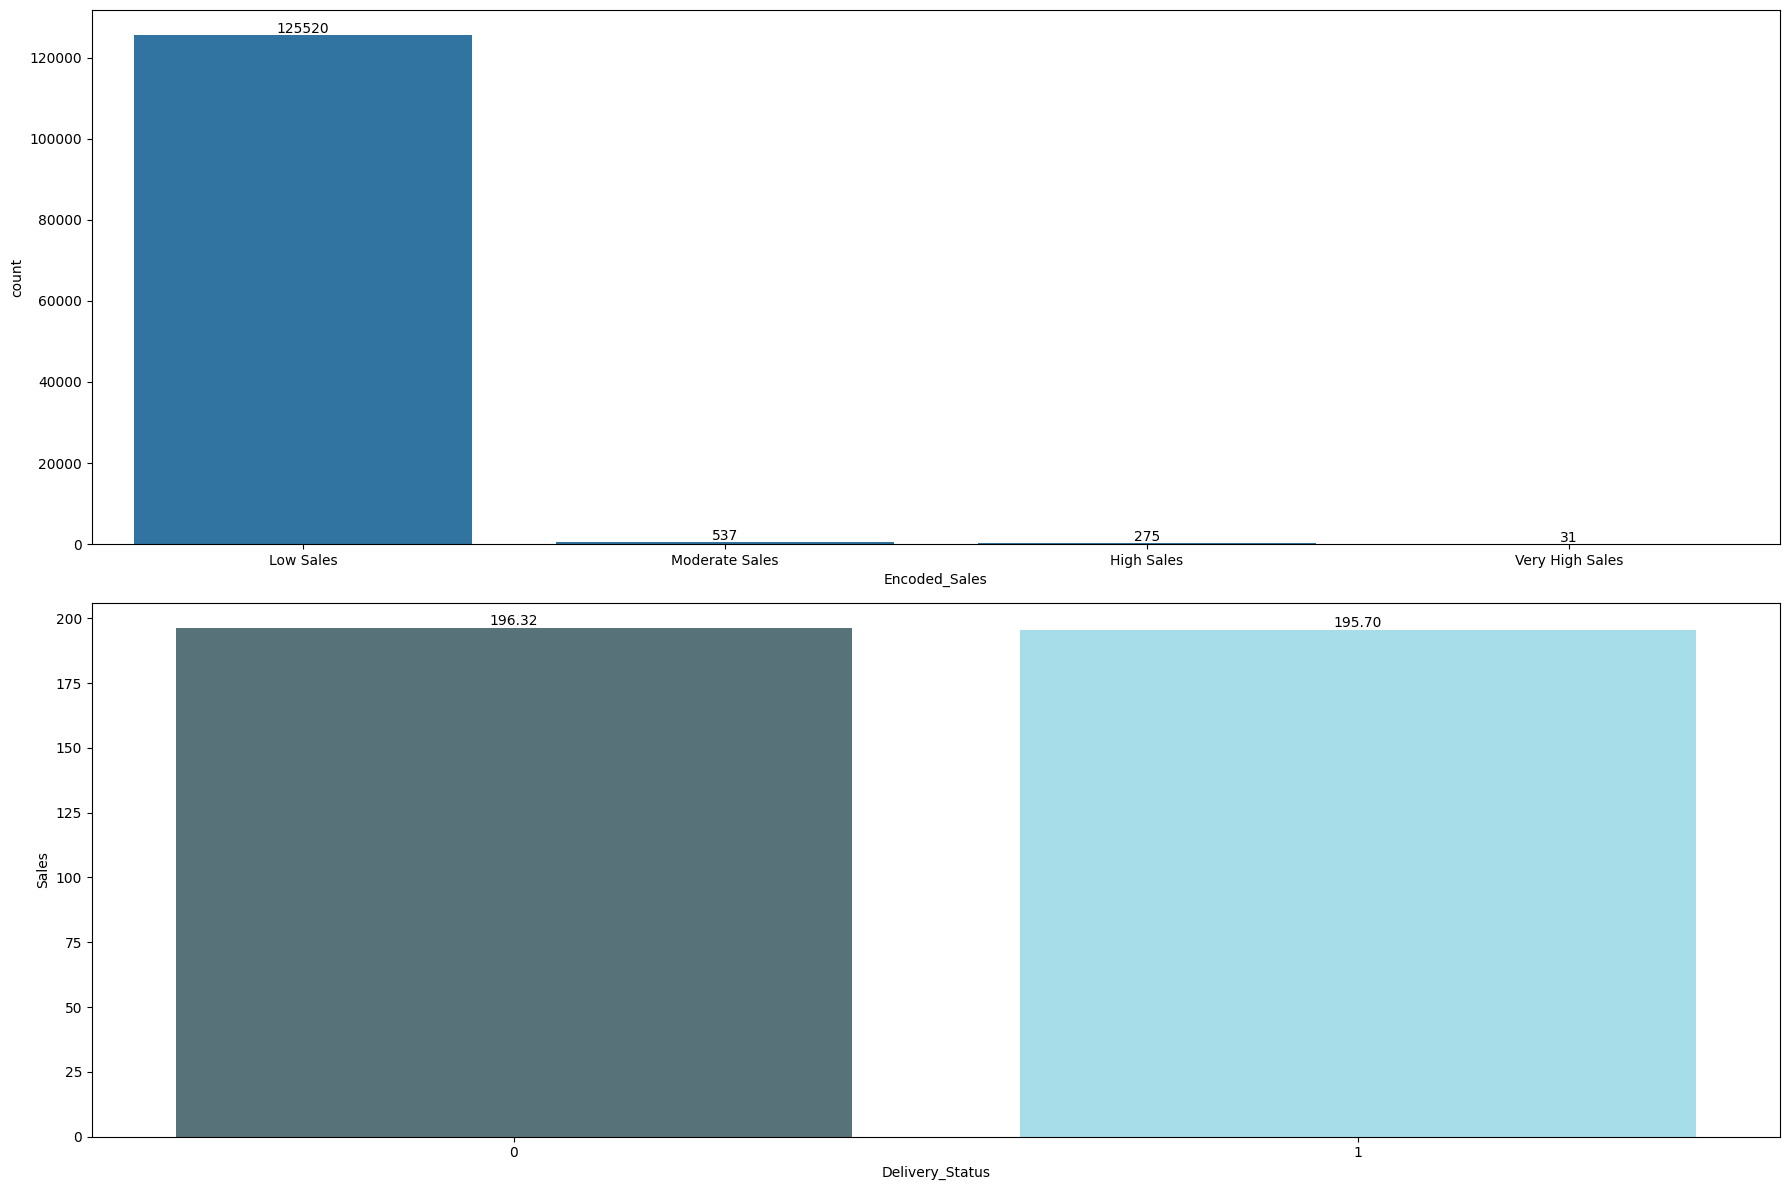

In [46]:
plt.figure.figsize=(15,350)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_dummy['Encoded_Sales'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 500, 
        f'{int(height)}', 
        ha="center", 
        color="black", 
        fontsize=10
    )
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x='Delivery_Status', y='Sales', data=df, palette=['#51767e', '#9be4f4'], ci=False)
y_values = df.groupby('Delivery_Status')['Sales'].mean().values  # Or use sum if that's your aggregation
for i, v in enumerate(y_values):
    plt.text(x=i, y=v+1, s=f'{v:.2f}', ha='center', color='black')
plt.xticks()
plt.tight_layout()
plt.show()

In [47]:
for i in range(0, len(df_dummy)):
    if df_dummy.loc[i, 'Price'] <= 20000:
        df_dummy.loc[i, 'Encoded_Price'] = 'Low Price'
    elif df_dummy.loc[i, 'Price'] > 20000 and df_dummy.loc[i, 'Price'] <= 50000:
        df_dummy.loc[i, 'Encoded_Price'] = 'Moderate Price'
    elif df_dummy.loc[i, 'Price'] > 50000 and df_dummy.loc[i, 'Price'] <= 100000:
        df_dummy.loc[i, 'Encoded_Price'] = 'High Price'
    else:
        df_dummy.loc[i, 'Encoded_Price'] = 'Very High Price'

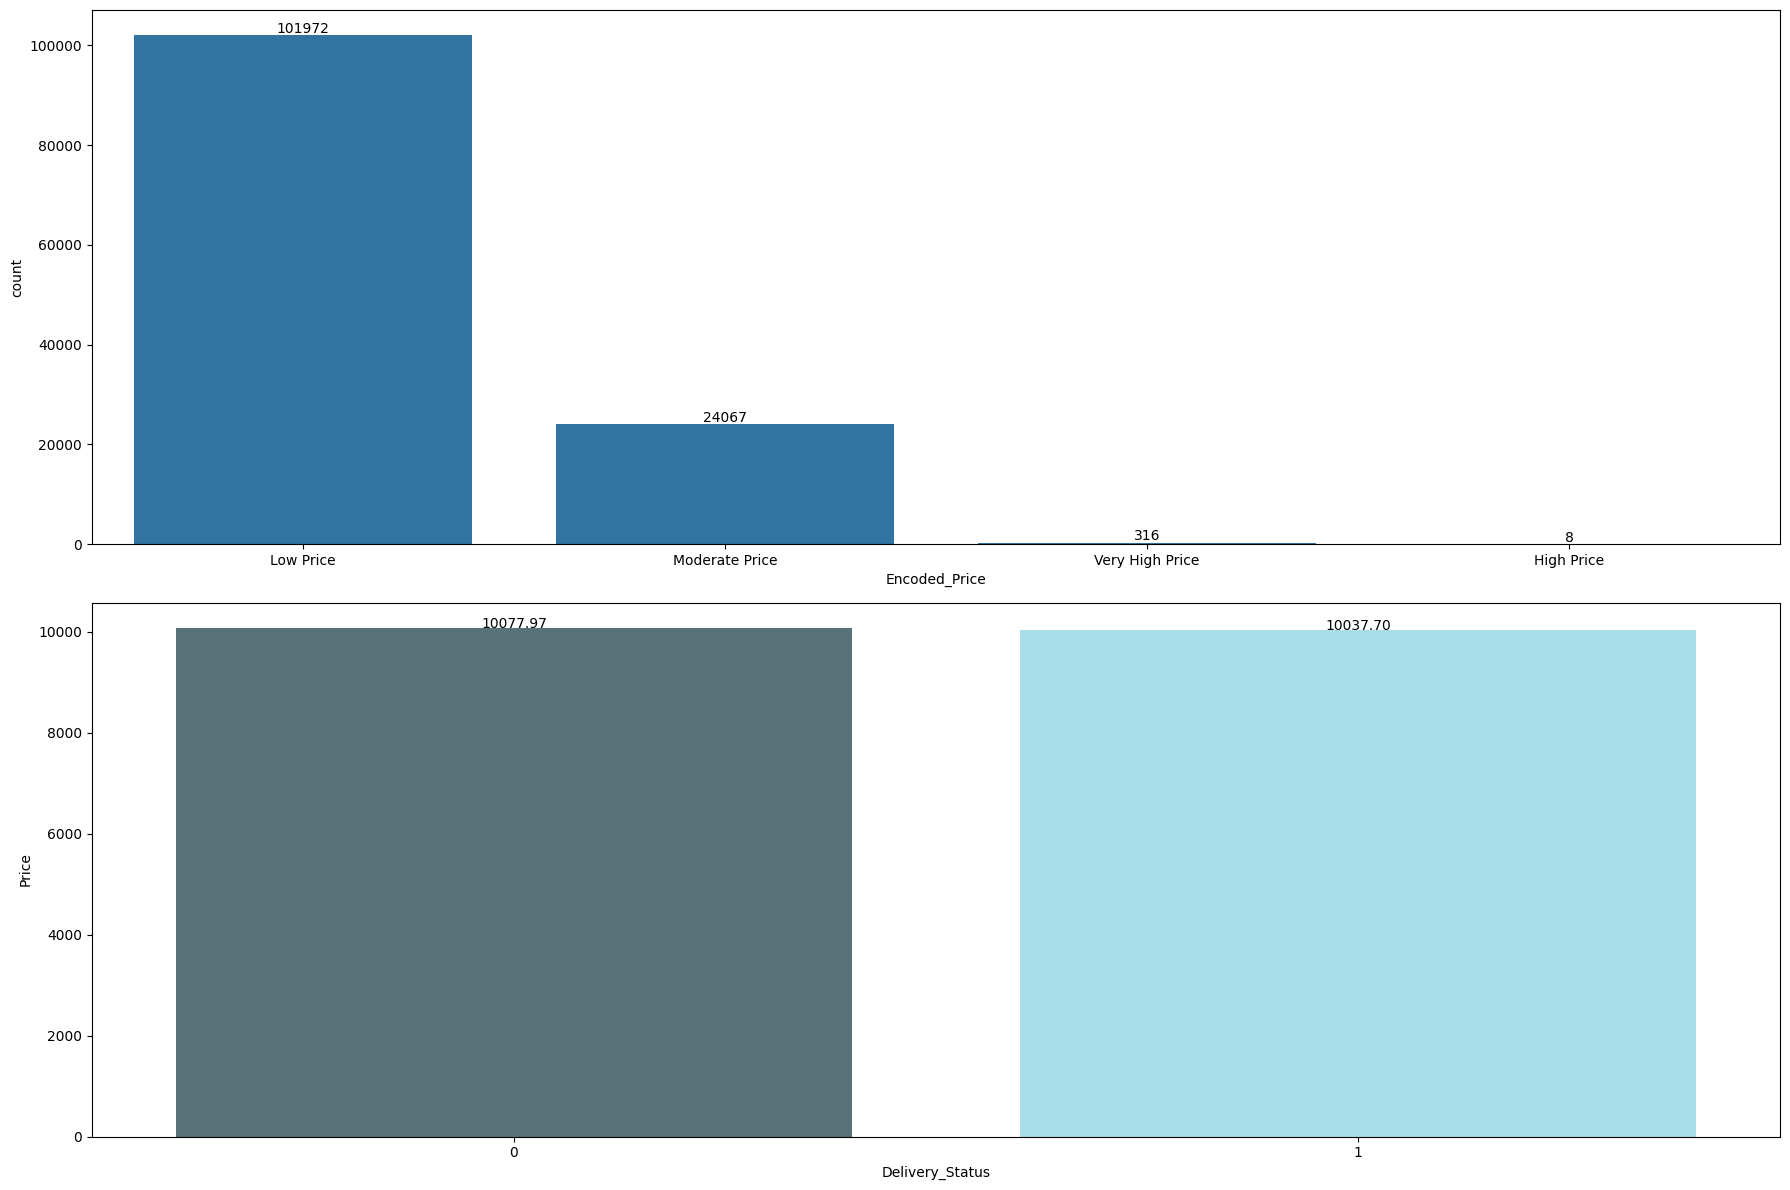

In [48]:
plt.figure.figsize=(15,350)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_dummy['Encoded_Price'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 500, 
        f'{int(height)}', 
        ha="center", 
        color="black", 
        fontsize=10
    )
plt.xticks()
plt.subplot(2,1,2)
sns.barplot(x='Delivery_Status', y='Price', data=df, palette=['#51767e', '#9be4f4'], ci=False)
y_values = df.groupby('Delivery_Status')['Price'].mean().values  # Or use sum if that's your aggregation
for i, v in enumerate(y_values):
    plt.text(x=i, y=v+1, s=f'{v:.2f}', ha='center', color='black')
plt.xticks()
plt.tight_layout()
plt.show()

In [49]:
for i in range(len(df_dummy)):
    if df_dummy.loc[i, 'Profit_Ratio'] > 0.5:
        df_dummy.loc[i, 'Encoded_Value'] = 'Very High'
    elif 0.0 < df_dummy.loc[i, 'Profit_Ratio'] <= 0.5:
        df_dummy.loc[i, 'Encoded_Value'] = 'Moderate'
    elif -1.5 <= df_dummy.loc[i, 'Profit_Ratio'] <= 0.0:
        df_dummy.loc[i, 'Encoded_Value'] = 'Low'
    else:
        df_dummy.loc[i, 'Encoded_Value'] = 'Very Low'

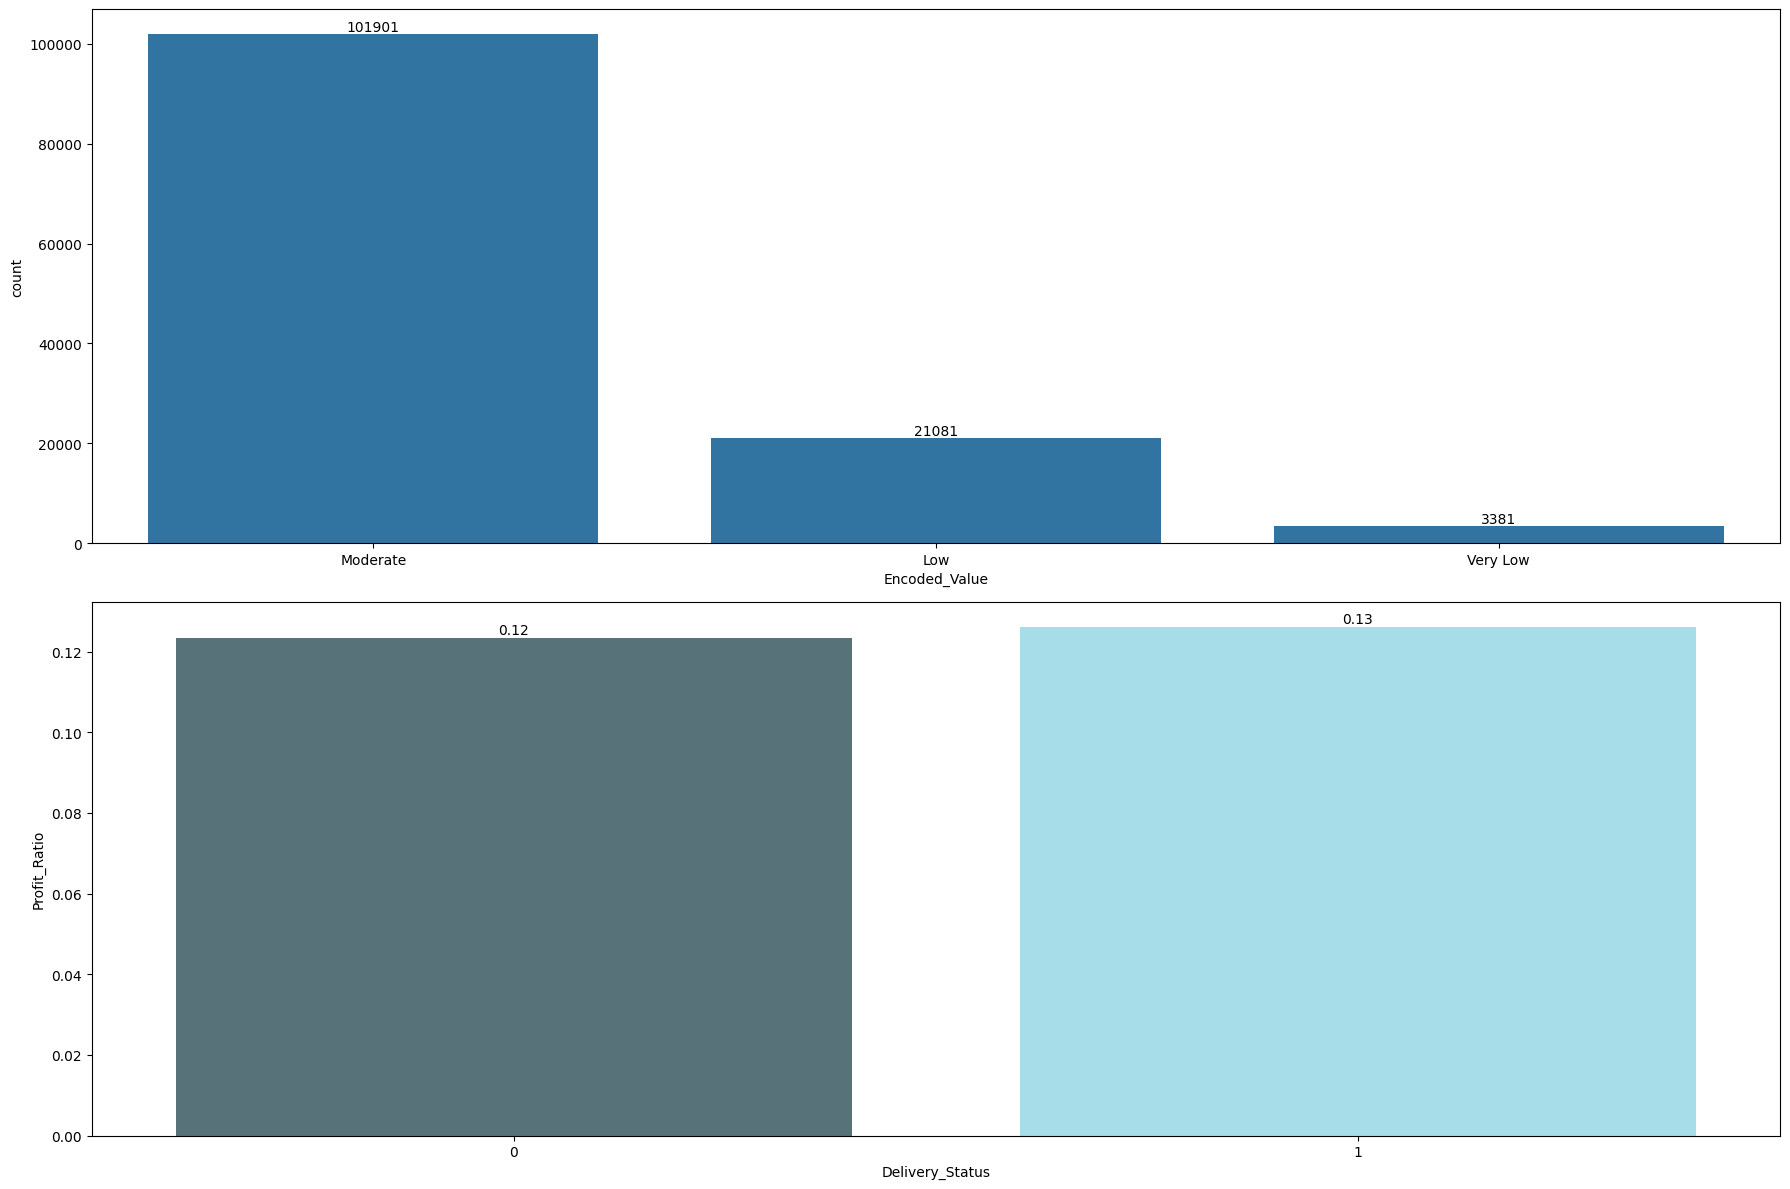

In [50]:
plt.figure.figsize=(15,8)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_dummy['Encoded_Value'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 600, 
        f'{int(height)}', 
        ha="center", 
        color="black", 
        fontsize=10
    )
plt.xticks()

plt.subplot(2,1,2)
sns.barplot(x='Delivery_Status', y='Profit_Ratio', data=df, palette=['#51767e', '#9be4f4'], ci=False)
y_values = df.groupby('Delivery_Status')['Profit_Ratio'].mean().values  # Or use sum if that's your aggregation
for i, v in enumerate(y_values):
    plt.text(x=i, y=v+0.001, s=f'{v:.2f}', ha='center', color='black')
plt.xticks()
plt.tight_layout()
plt.show()

In [51]:
for i in range(len(df_dummy)):
    if df_dummy.loc[i, 'Order_Profit '] <= 10000:
        df_dummy.loc[i, 'Encoded_Order_Profit'] = 'Low Profit'
    elif df_dummy.loc[i, 'Order_Profit '] > 10000 and df_dummy.loc[i, 'Order_Profit '] <= 50000:
        df_dummy.loc[i, 'Encoded_Order_Profit'] = 'Moderate Profit'
    elif df_dummy.loc[i, 'Order_Profit '] > 50000 and df_dummy.loc[i, 'Order_Profit '] <= 100000:
        df_dummy.loc[i, 'Encoded_Order_Profit'] = 'High Profit'
    else:
        df_dummy.loc[i, 'Encoded_Order_Profit'] = 'Very High Profit'

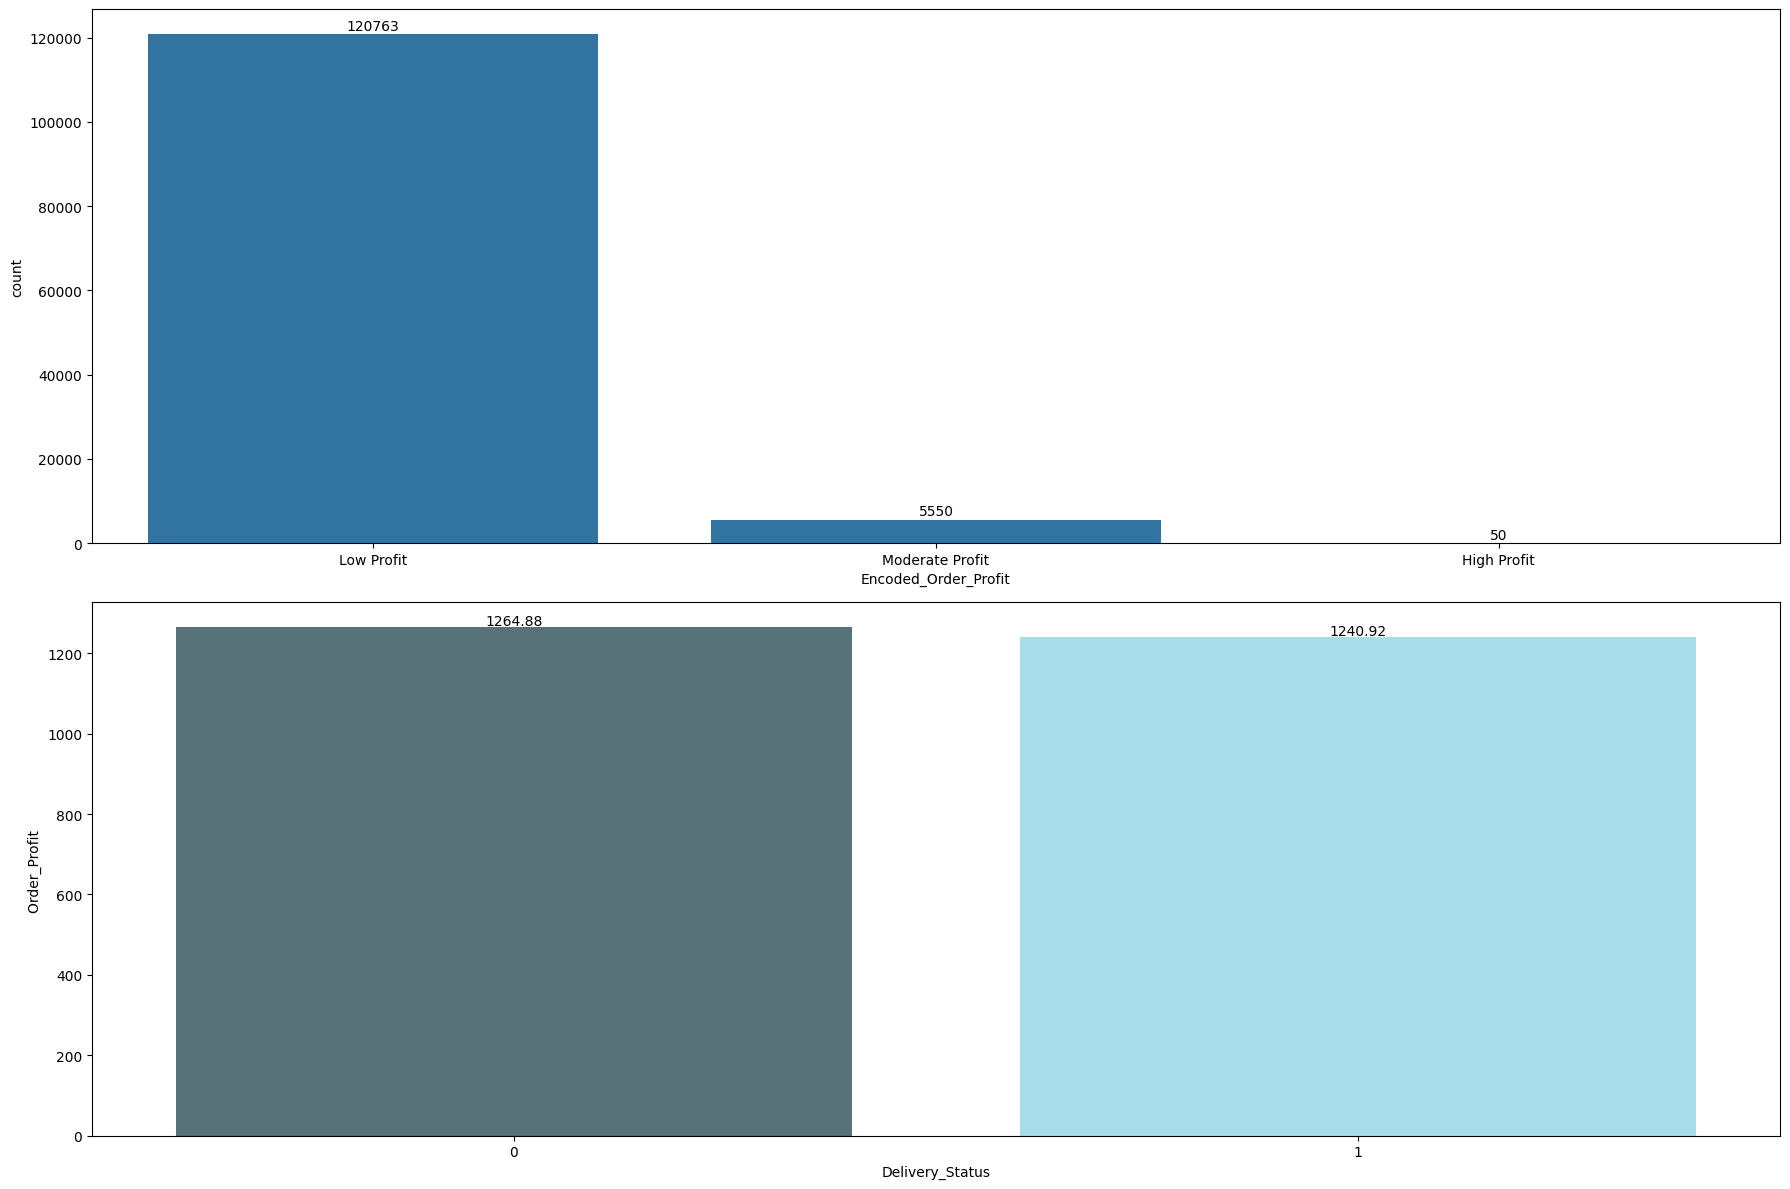

In [52]:
plt.figure.figsize=(15,8)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_dummy['Encoded_Order_Profit'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 1000, 
        f'{int(height)}', 
        ha="center", 
        color="black", 
        fontsize=10
    )
plt.xticks()

plt.subplot(2,1,2)
sns.barplot(x='Delivery_Status', y='Order_Profit ', data=df, palette=['#51767e', '#9be4f4'], ci=False)
y_values = df.groupby('Delivery_Status')['Order_Profit '].mean().values  # Or use sum if that's your aggregation
for i, v in enumerate(y_values):
    plt.text(x=i, y=v+5, s=f'{v:.2f}', ha='center', color='black')
plt.xticks()
plt.tight_layout()
plt.show()

Business Inference:
The vast majority of orders yield low profit, with very few generating moderate or high profits. Despite the slight difference, orders that were successfully delivered (Delivery_Status = 1) tend to have a slightly lower average profit compared to undelivered orders (Delivery_Status = 0). This may indicate that high-priority deliveries or challenges in fulfilling certain orders impact profitability.

In [53]:
for i in range(0, len(df_dummy)):
    if df_dummy.loc[i, 'ProductLength'] <= 50:
        df_dummy.loc[i, 'Encoded_ProductLength'] = 'Short'
    elif df_dummy.loc[i, 'ProductLength'] > 50 and df_dummy.loc[i, 'ProductLength'] <= 100:
        df_dummy.loc[i, 'Encoded_ProductLength'] = 'Medium'
    elif df_dummy.loc[i, 'ProductLength'] > 100 and df_dummy.loc[i, 'ProductLength'] <= 150:
        df_dummy.loc[i, 'Encoded_ProductLength'] = 'Long'
    else:
        df_dummy.loc[i, 'Encoded_ProductLength'] = 'Very Long'

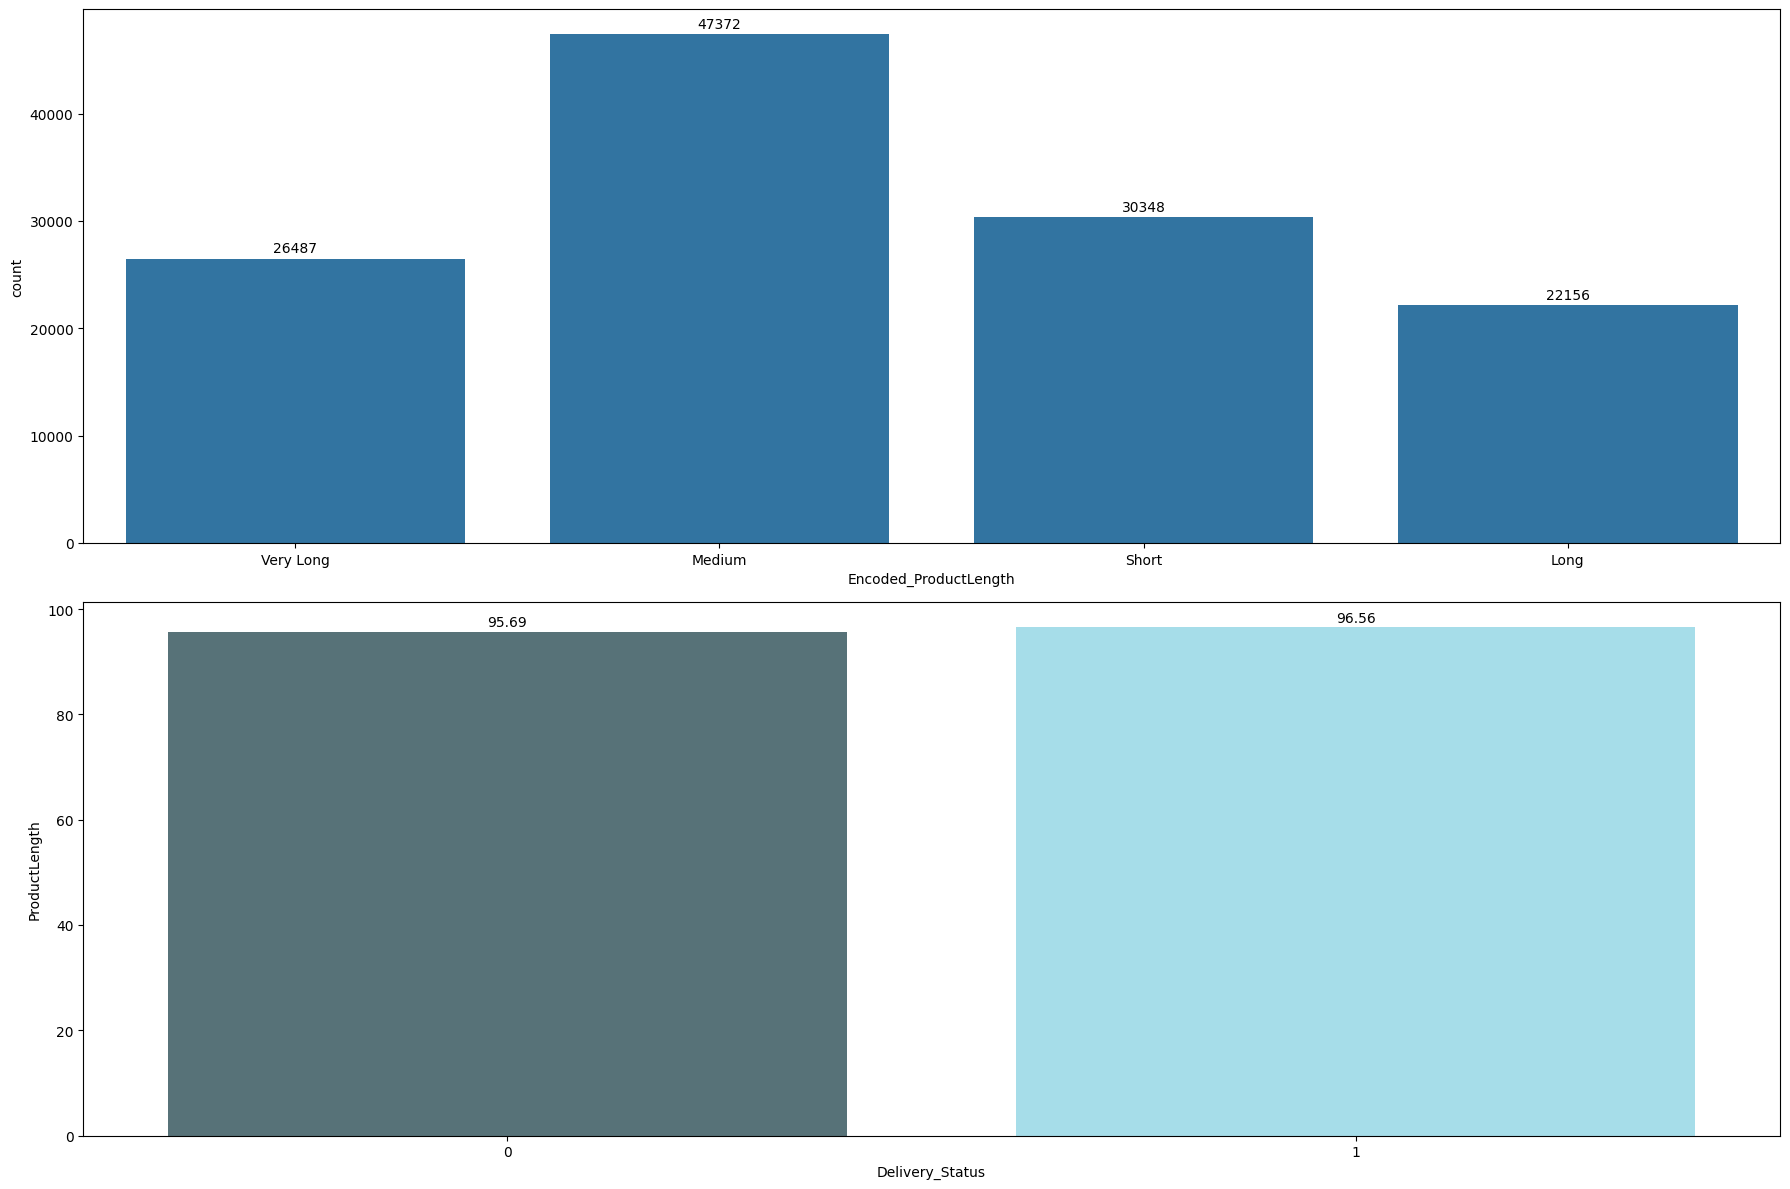

In [54]:
plt.figure.figsize=(15,8)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_dummy['Encoded_ProductLength'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 600, 
        f'{int(height)}', 
        ha="center", 
        color="black", 
        fontsize=10
    )
plt.xticks()

plt.subplot(2,1,2)
sns.barplot(x='Delivery_Status', y='ProductLength', data=df, palette=['#51767e', '#9be4f4'], ci=False)
y_values = df.groupby('Delivery_Status')['ProductLength'].mean().values  # Or use sum if that's your aggregation
for i, v in enumerate(y_values):
    plt.text(x=i, y=v+1, s=f'{v:.2f}', ha='center', color='black')
plt.xticks()
plt.tight_layout()
plt.show()

In [55]:
for i in range(0, len(df_dummy)):
    if df_dummy.loc[i, 'ProductWeight'] <= 10000:
        df_dummy.loc[i, 'Encoded_ProductWeight'] = 'Light'
    elif df_dummy.loc[i, 'ProductWeight'] > 10000 and df_dummy.loc[i, 'ProductWeight'] <= 20000:
        df_dummy.loc[i, 'Encoded_ProductWeight'] = 'Moderate'
    elif df_dummy.loc[i, 'ProductWeight'] > 20000 and df_dummy.loc[i, 'ProductWeight'] <= 30000:
        df_dummy.loc[i, 'Encoded_ProductWeight'] = 'Heavy'
    else:
        df_dummy.loc[i, 'Encoded_ProductWeight'] = 'Very Heavy'

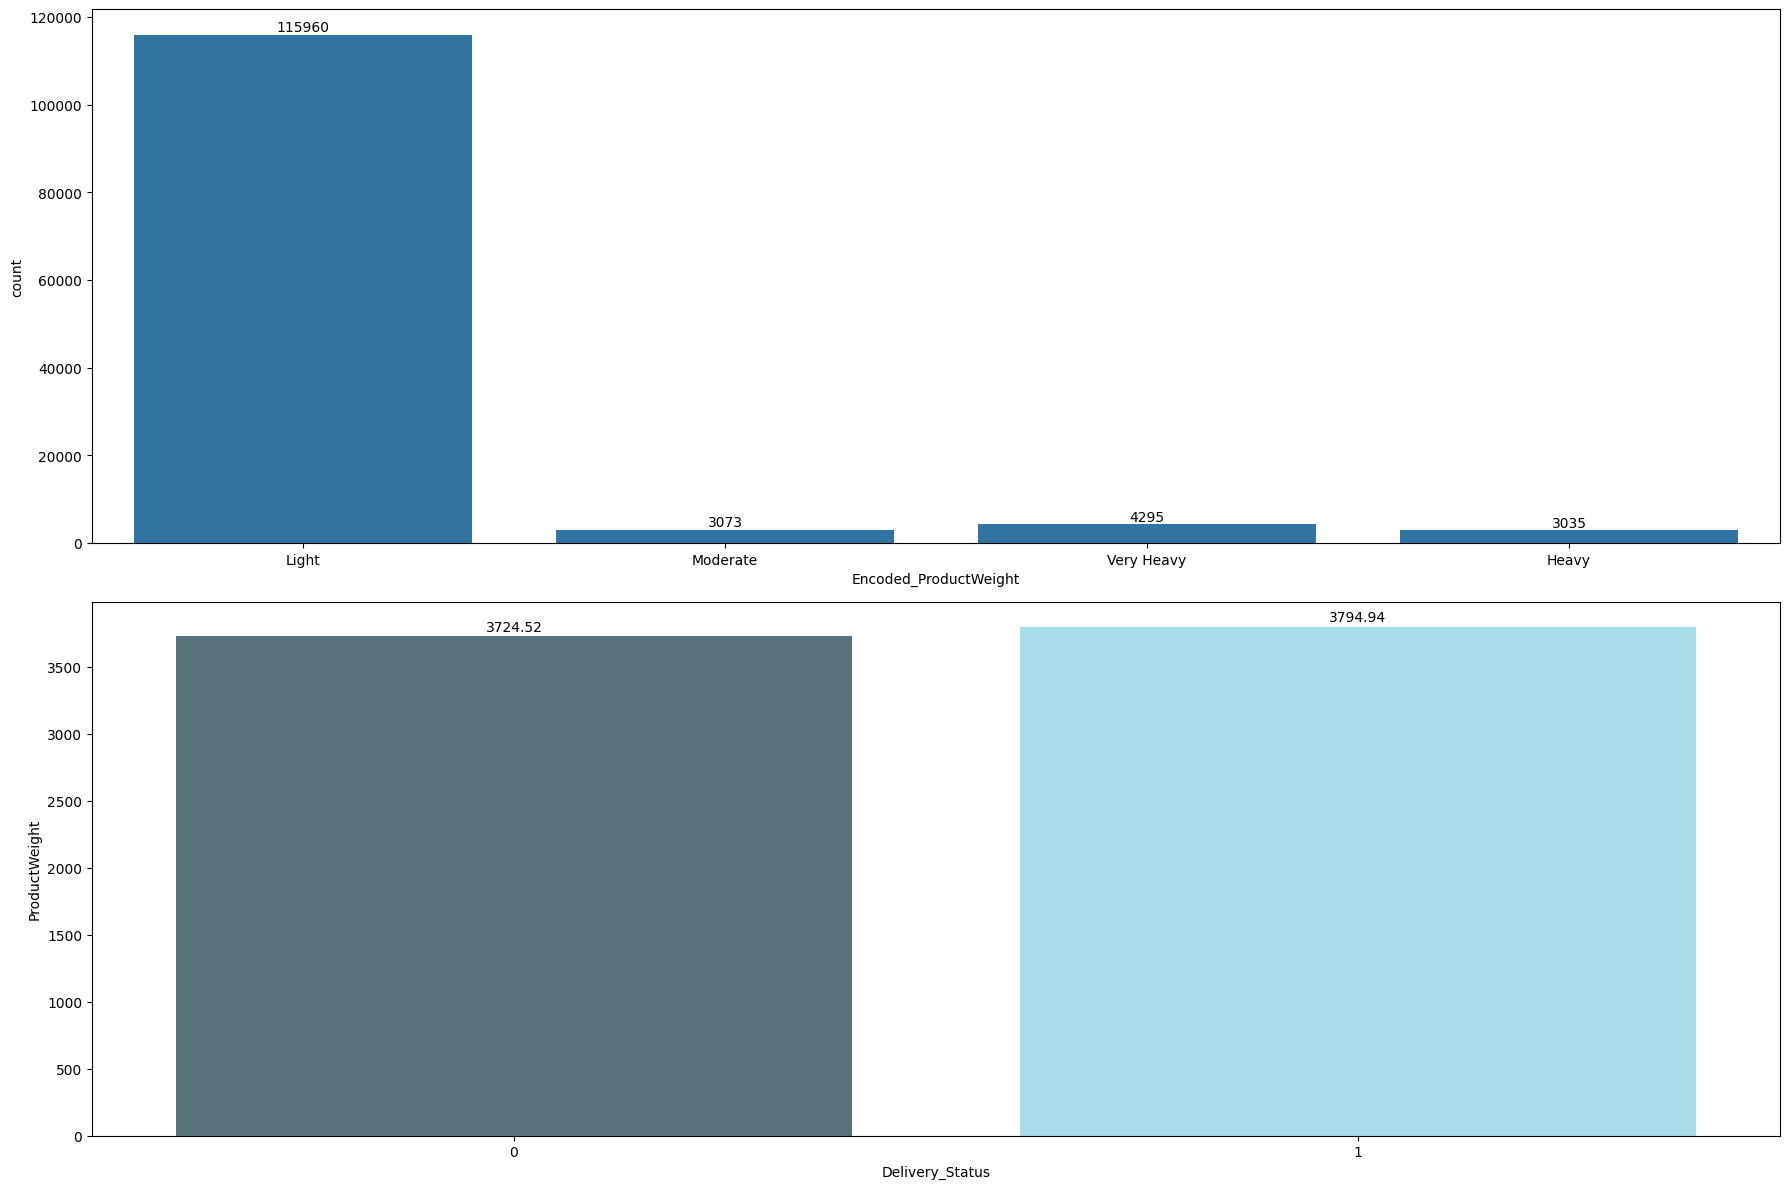

In [56]:
plt.figure.figsize=(15,8)
plt.subplots_adjust(hspace=0.5)
plt.subplot(2,1,1)
ax = sns.countplot(x=df_dummy['Encoded_ProductWeight'])
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height + 700, 
        f'{int(height)}', 
        ha="center", 
        color="black", 
        fontsize=10
    )
plt.xticks()

plt.subplot(2,1,2)
sns.barplot(x='Delivery_Status', y='ProductWeight', data=df, palette=['#51767e', '#9be4f4'], ci=False)
y_values = df.groupby('Delivery_Status')['ProductWeight'].mean().values  
for i, v in enumerate(y_values):
    plt.text(x=i, y=v+40, s=f'{v:.2f}', ha='center', color='black')
plt.xticks()
plt.tight_layout()
plt.show()

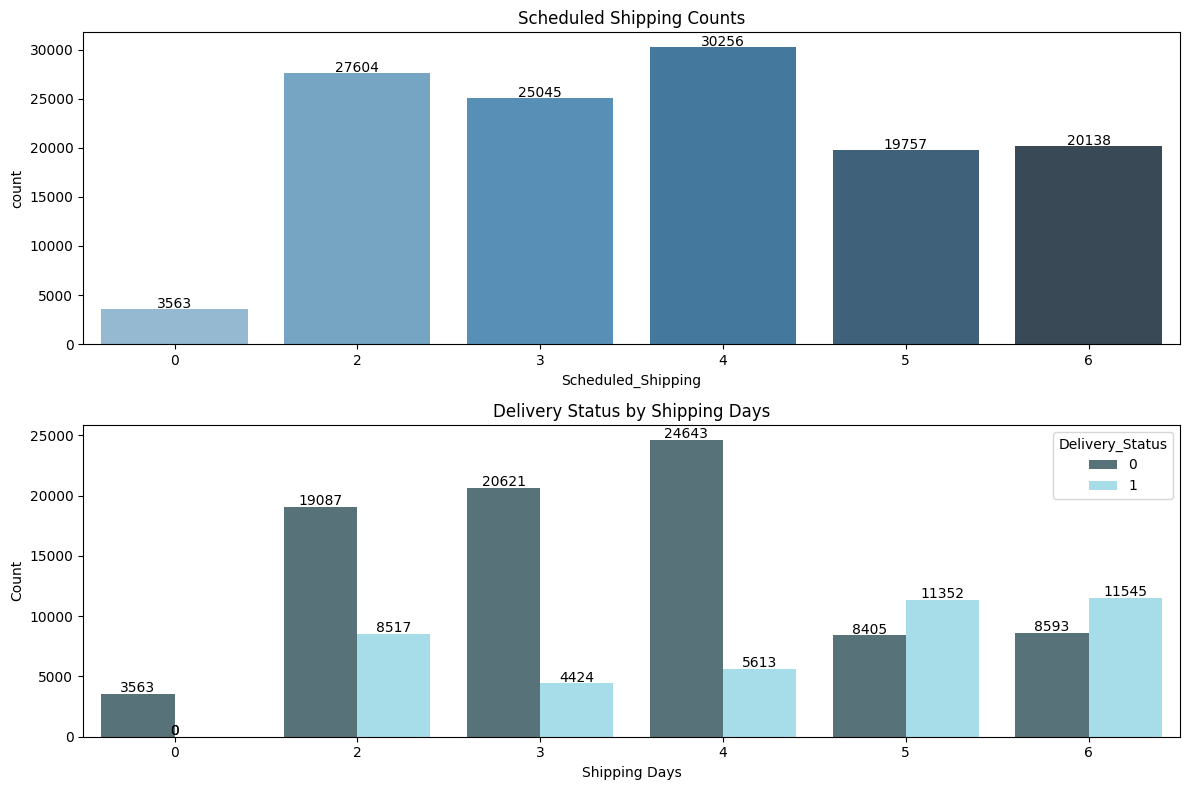

In [57]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.countplot(x=df1['Scheduled_Shipping'], palette='Blues_d')
plt.title('Scheduled Shipping Counts')
for i, v in enumerate(df1['Scheduled_Shipping'].value_counts().sort_index()):
    plt.text(x=i, y=v + 150, s=f'{v}', ha='center', color='black')
plt.subplot(2,1,2)
ax = sns.countplot(data=df, x='Scheduled_Shipping', hue='Delivery_Status', palette=['#51767e', '#9be4f4'])
plt.title('Delivery Status by Shipping Days')
plt.xlabel('Shipping Days')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 150, s=f'{int(height)}', ha='center', color='black')
plt.tight_layout()
plt.show()

The analysis reveals that most orders are scheduled for 2 to 4 days of shipping, with 4-day schedules being the most frequent. Orders scheduled for 2, 3, and 4 days tend to have higher on-time delivery rates, while those scheduled for 5 and 6 days are more prone to delays. This suggests that longer shipping schedules may introduce inefficiencies, impacting delivery timeliness. Optimizing and potentially reducing scheduled shipping times, especially for 5 and 6 days, could improve overall delivery performance and customer satisfaction by minimizing delays.

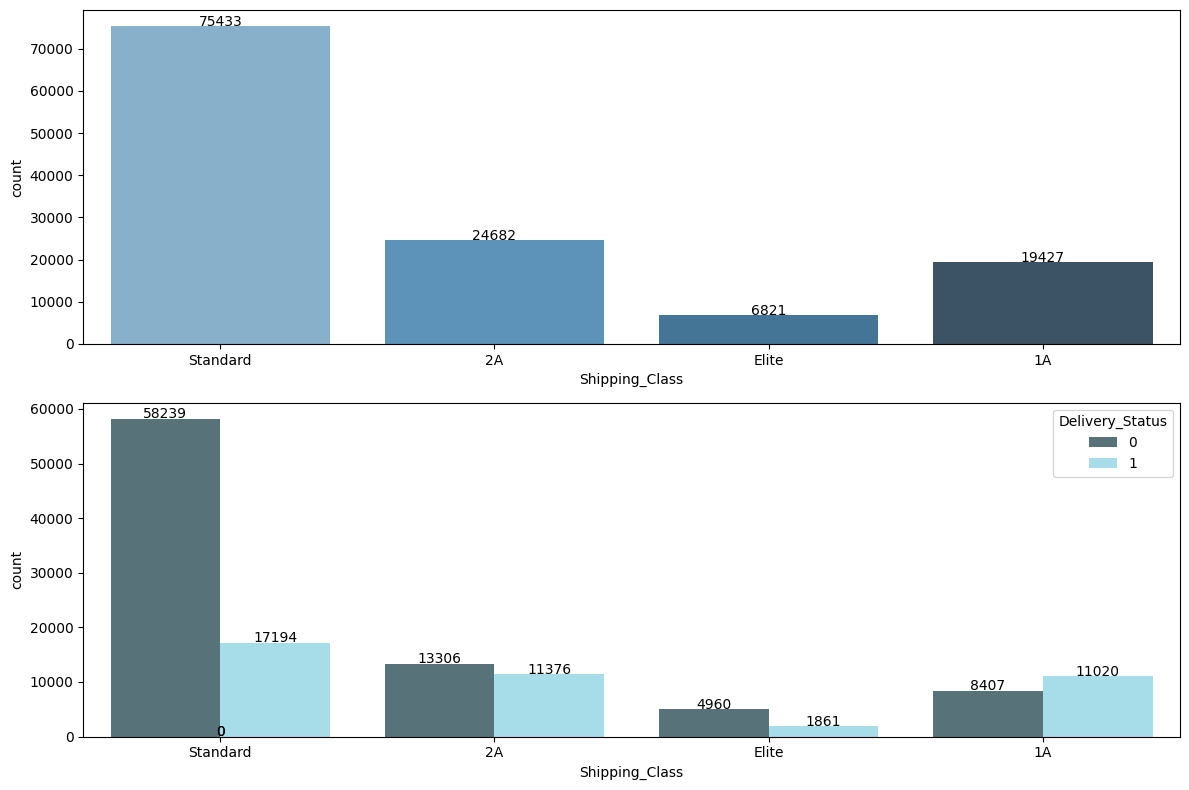

In [58]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
ax1 = sns.countplot(x=df1['Shipping_Class'], palette='Blues_d')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(x=p.get_x() + p.get_width() / 2, y=height + 1, s=f'{int(height)}', ha='center', color='black')
plt.subplot(2,1,2)
ax2 = sns.countplot(data=df1, x='Shipping_Class', hue='Delivery_Status', palette=['#51767e', '#9be4f4'])
for p in ax2.patches:
    height = p.get_height()
    ax2.text(x=p.get_x() + p.get_width() / 2, y=height + 150, s=f'{int(height)}', ha='center', color='black')
plt.tight_layout()
plt.show()

The analysis shows that the majority of orders use the "Standard" shipping class, followed by "2A," "1A," and "Elite." Orders shipped with the "Standard" class have a higher rate of on-time deliveries, suggesting it is generally reliable. However, "1A" has a significant proportion of delayed orders despite being a premium class, indicating potential inefficiencies or issues specific to this shipping class. "Elite," while less frequently used, has the lowest delay rate, suggesting it is the most dependable for timely deliveries. This insight highlights the need to investigate and potentially improve "1A" shipping class operations to reduce delays.

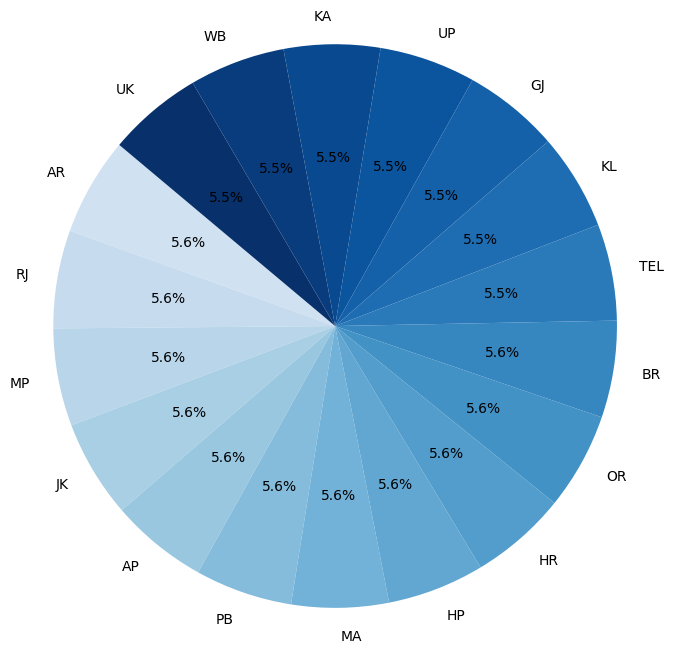

In [59]:
states = ['AR', 'RJ', 'MP', 'JK', 'AP', 'PB', 'MA', 'HP', 'HR', 'OR', 'BR', 'TEL', 'KL', 'GJ', 'UP', 'KA', 'WB', 'UK']
counts = [7105, 7104, 7077, 7072, 7065, 7046, 7041, 7032, 7027, 7023, 7020, 7000, 6980, 6979, 6978, 6974, 6945, 6895]

cmap = cm.get_cmap('Blues')
colors = cmap(np.linspace(0.2, 1, len(states)))

plt.figure(figsize=(8, 8))
plt.pie(counts, labels=states, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal') 
plt.show()


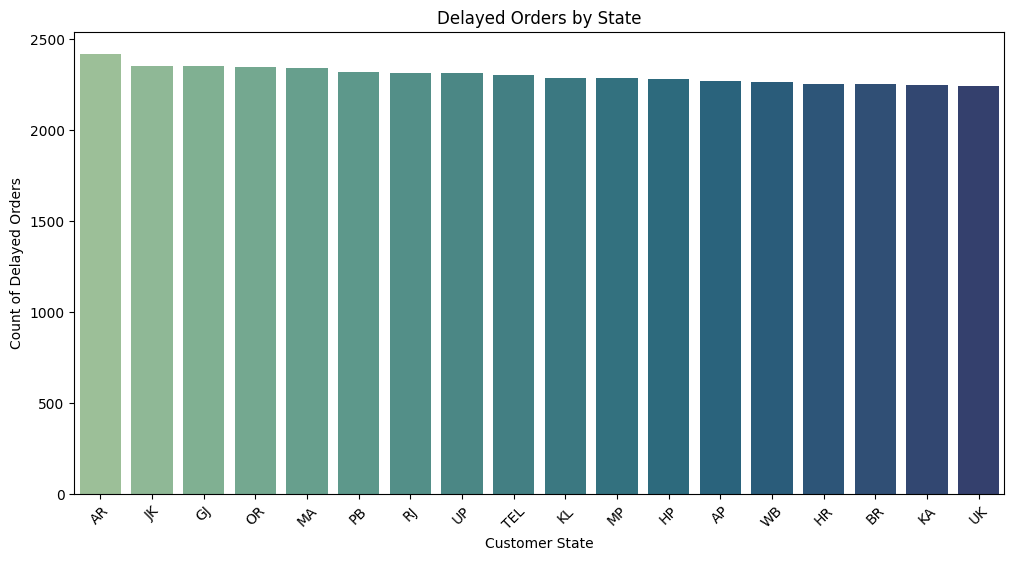

In [60]:
delayed_orders = df1[df1['Delivery_Status'] == 1]

plt.figure(figsize=(12, 6))
sns.countplot(data=delayed_orders, x='Cust_State', order=delayed_orders['Cust_State'].value_counts().index, palette="crest")
plt.title("Delayed Orders by State")
plt.xlabel("Customer State")
plt.ylabel("Count of Delayed Orders")
plt.xticks(rotation=45)
plt.show()


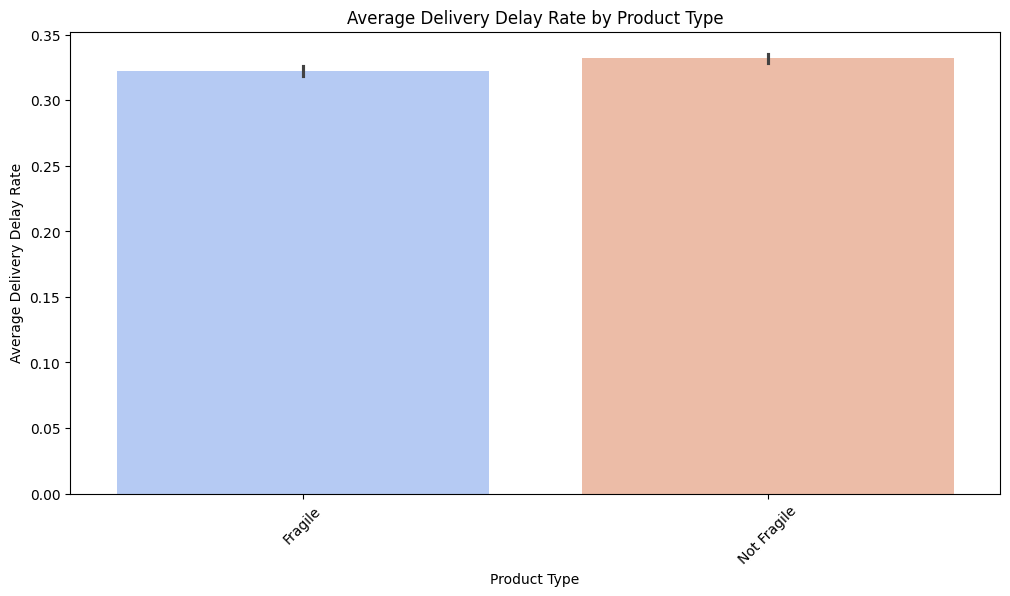

In [61]:
avg_delay = df1.groupby('Product_type')['Delivery_Status'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df1, x='Product_type', y='Delivery_Status', palette="coolwarm")
plt.title("Average Delivery Delay Rate by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Average Delivery Delay Rate")
plt.xticks(rotation=45)
plt.show()

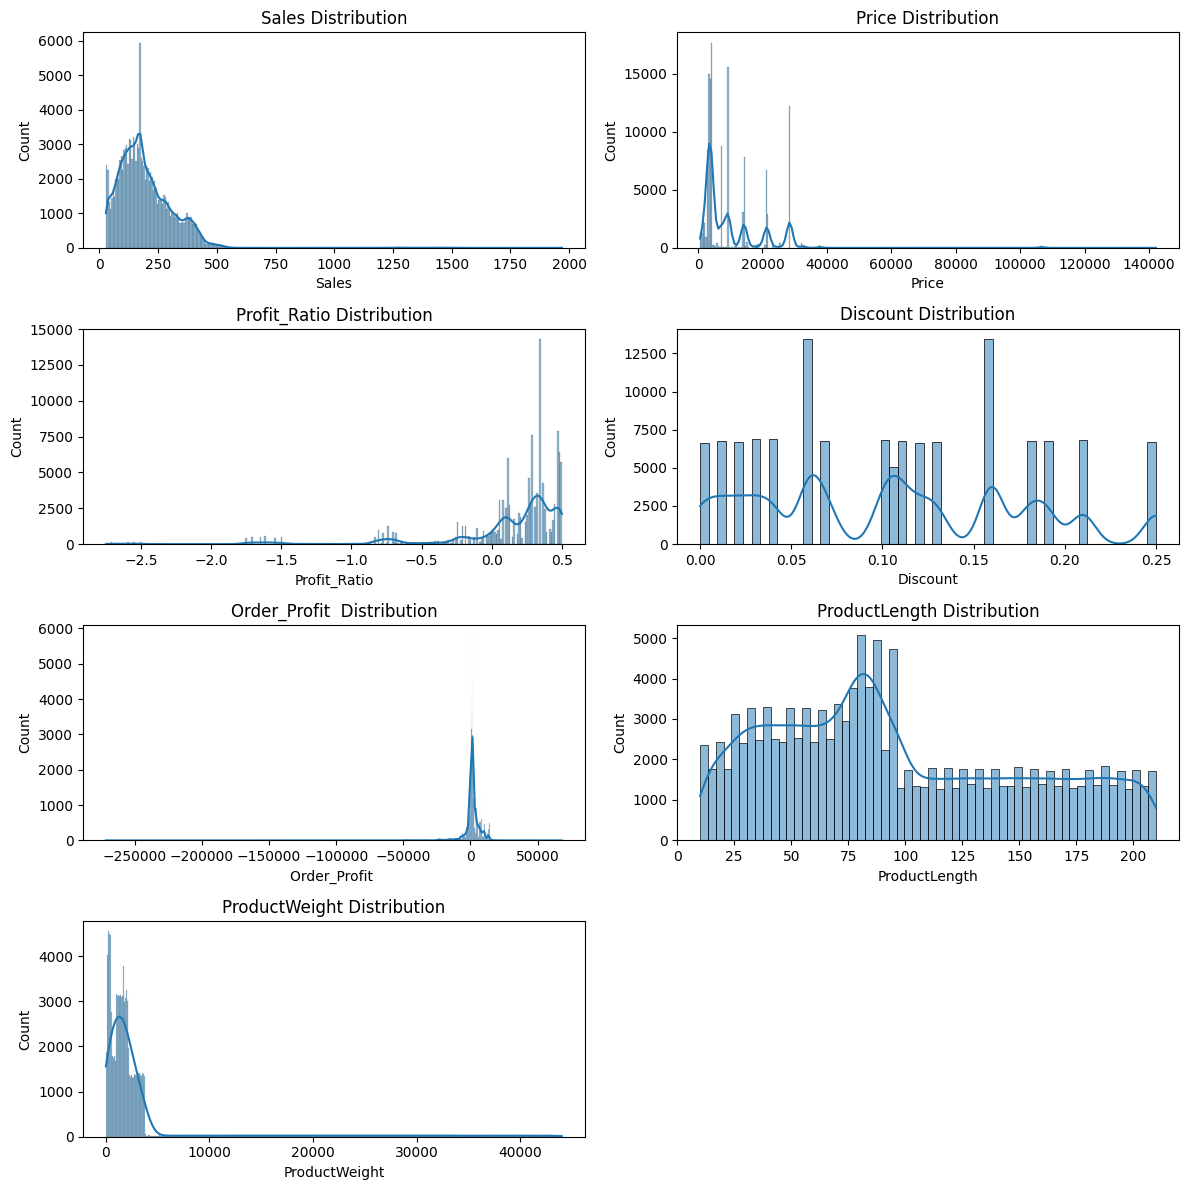

In [62]:
plt.figure(figsize=(12, 12))  
t = 1
for i in num:
    plt.subplot(4, 2, t)
    sns.histplot(df1[i], kde=True)
    plt.title(f'{i} Distribution')  
    t += 1
plt.tight_layout()
plt.show();

## Outliers

In [63]:
len(df1[num].columns.to_list())

7

In [64]:
print(num)

['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ', 'ProductLength', 'ProductWeight']


In [65]:
to_chk = ['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductWeight']

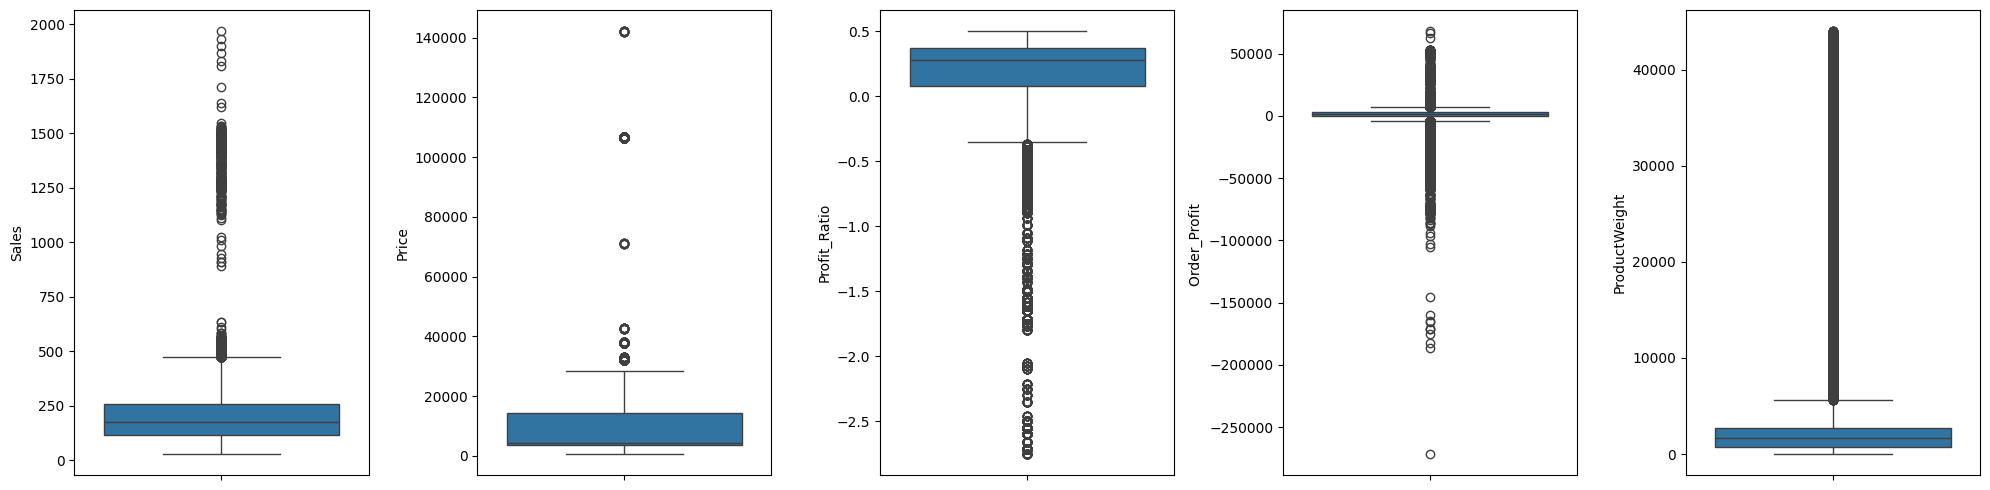

In [66]:
plt.rcParams['figure.figsize']=[20,5]
t=1
for i in to_chk:
    plt.subplot(1,5,t)
    sns.boxplot(df1[i])
    t+=1
plt.tight_layout()
plt.show()

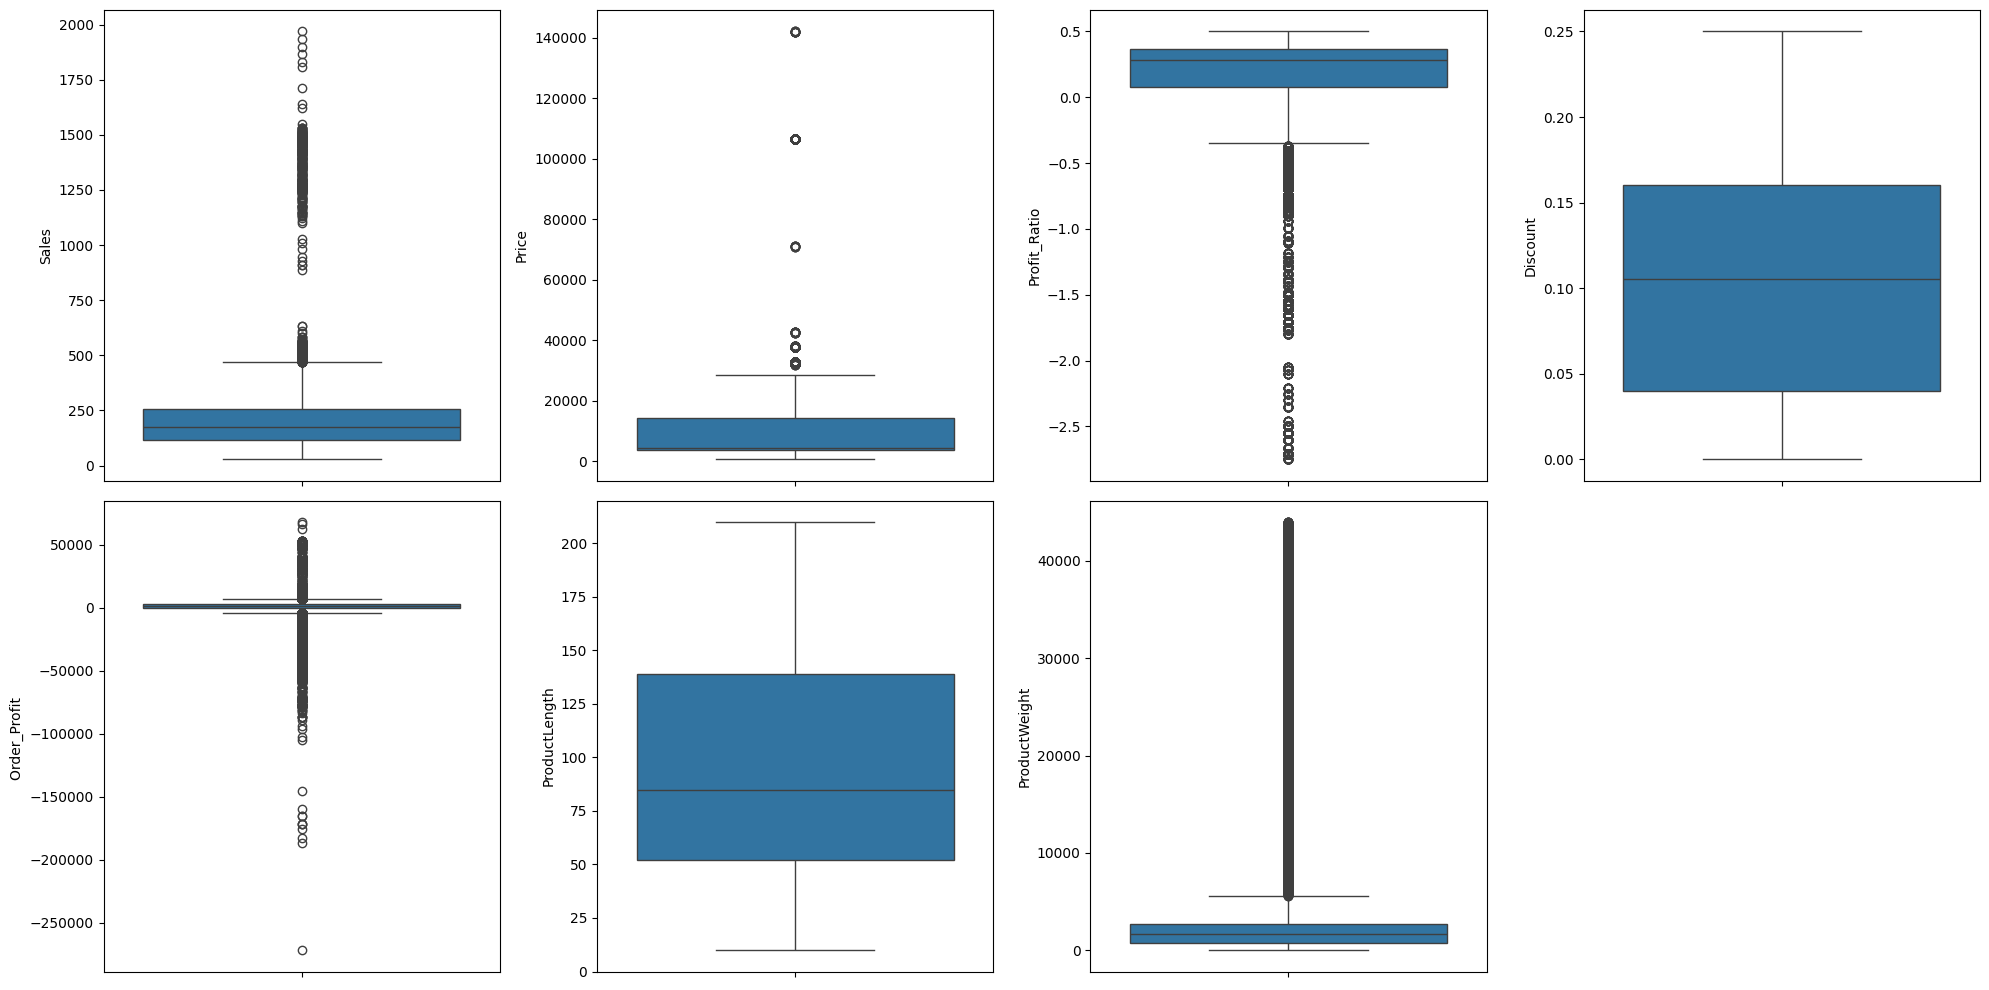

In [67]:
plt.rcParams['figure.figsize']=[20,10]
t=1
for i in num:
    plt.subplot(2,4,t)
    sns.boxplot(df1[i])
    t+=1
plt.tight_layout()
plt.show()

In our dataset, the observed outliers appear to be valid and reflective of the business context:

- **Sales**: Higher values are expected due to a mix of corporate and consumer sales, with larger orders from corporate clients.
- **Price**: Certain products have high prices and later the same product could be potentially influenced by seasonal discounts or exclusive offerings.
- **Profit Ratio**: Outliers represent genuine cases where some products lead to losses, likely due to high-cost structures or discounting strategies.
- **Order Profit**: Outliers on both ends suggest that some products are significantly profitable, while others incur losses, reflecting actual performance trends.
- **Product Weight**: Outliers in weight likely correspond to genuinely heavier products in the catalog.

Since these outliers are genuine and relevant to understanding our business operations, there is no need to remove or cap them.

## Statistical significance of variables

#### ttest

In [126]:
def ttest(var):
    g1 = df1.loc[df1['Delivery_Status'] == 0, var]
    g2 = df1.loc[df1['Delivery_Status'] == 1, var]
    stat, pval = stats.ttest_ind(g1, g2, equal_var=False)
    if pval < 0.05:
        print(f"\nThere is a statistically significant difference between the mean values of the two groups for the variable: {var}")
    else:
        print(f"\nThere is no statistically significant difference between the mean values of the two groups for the variable: {var}")

In [127]:
numerical_columns = ['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ', 
                     'ProductLength', 'ProductWeight']
for var in numerical_columns:
    ttest(var)


There is no statistically significant difference between the mean values of the two groups for the variable: Sales

There is no statistically significant difference between the mean values of the two groups for the variable: Price

There is no statistically significant difference between the mean values of the two groups for the variable: Profit_Ratio

There is no statistically significant difference between the mean values of the two groups for the variable: Discount

There is no statistically significant difference between the mean values of the two groups for the variable: Order_Profit 

There is a statistically significant difference between the mean values of the two groups for the variable: ProductLength

There is no statistically significant difference between the mean values of the two groups for the variable: ProductWeight


#### chisquare

In [128]:
def chisq(i, var): 
    print(f"\n{i}: Variable, {var}") 
    crosstab = pd.crosstab(df1[var], df1['Delivery_Status']) 
    res = stats.chi2_contingency(crosstab) 
 
    print("\nThe important assumption: No more than 20% of the cells have and expected cell count < 5") 
    print("\nThis can be checked by looking at the expected frequency table.") 
    print(res) 
 
    expected = res[3] 
    percentage_low_expected = (expected < 5).sum().sum() / expected.size * 100 
    print(f"\nPercentage of cells with expected counts less than 5: {percentage_low_expected:.2f}%") 
 
    if res[1] < 0.05: 
        print(f"\n{var} and Target variable are dependent") 
    else:
        print(f"\n{var} and Target variable are independent")

In [129]:
categorical_columns = ['Customer_Category', 'Cust_State', 'Order_zone', 'CategoryName',
                       'Transcation', 'Dept_Name', 'Quantity', 'Product_type', 'Dispatched',
                       'Shipping_Class', 'Scheduled_Shipping', 'Warehouse_Region', 'Delivery_Review',
                       'Session_Ordered', 'WeekdayOrder', 'Delivery_Status']
i = 1
for var in categorical_columns:
    chisq(i, var)
    i += 1


1: Variable, Customer_Category

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=0.4125284088729453, pvalue=0.8136180863755129, dof=2, expected_freq=array([[43989.76890387, 21474.23109613],
       [25776.72514898, 12583.27485102],
       [15145.50594715,  7393.49405285]]))

Percentage of cells with expected counts less than 5: 0.00%

Customer_Category and Target variable are independent

2: Variable, Cust_State

The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=18.368996133648476, pvalue=0.36592787189349185, dof=17, expected_freq=array([[4747.45993685, 2317.54006315],
       [4774.33869091, 2330.66130909],
       [4717.22133852, 2302.77866148],
       [4689.67061561, 2289.32938439],
       [4725.28496474, 2306.715035


The important assumption: No more than 20% of the cells have and expected cell count < 5

This can be checked by looking at the expected frequency table.
Chi2ContingencyResult(statistic=126358.46338551206, pvalue=0.0, dof=1, expected_freq=array([[57058.2191306, 27853.7808694],
       [27853.7808694, 13597.2191306]]))

Percentage of cells with expected counts less than 5: 0.00%

Delivery_Status and Target variable are dependent


#### Shapiro

In [73]:
num_vars = ['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ', 
            'ProductLength', 'ProductWeight']
for i, var in enumerate(num_vars, 1):
    x = df1[var]
    stat, pval = stats.shapiro(x)
    print(f"\n\n{i}: P value of Shapiro test for {var} is {pval:.4f}")
    if pval < 0.05:
        print(f"\nSamples of {var} are NOT from a normal distribution")
    else:
        print(f"\nSamples of {var} are from a normal distribution")



1: P value of Shapiro test for Sales is 0.0000

Samples of Sales are NOT from a normal distribution


2: P value of Shapiro test for Price is 0.0000

Samples of Price are NOT from a normal distribution


3: P value of Shapiro test for Profit_Ratio is 0.0000

Samples of Profit_Ratio are NOT from a normal distribution


4: P value of Shapiro test for Discount is 0.0000

Samples of Discount are NOT from a normal distribution


5: P value of Shapiro test for Order_Profit  is 0.0000

Samples of Order_Profit  are NOT from a normal distribution


6: P value of Shapiro test for ProductLength is 0.0000

Samples of ProductLength are NOT from a normal distribution


7: P value of Shapiro test for ProductWeight is 0.0000

Samples of ProductWeight are NOT from a normal distribution


## Log odds

In [74]:
def check_linearity_subplot(df, target, num_variables):
    num_plots = len(num_variables)
    fig, axes = plt.subplots(nrows=(num_plots + 1) // 2, ncols=2, figsize=(15, num_plots * 2.5))
    fig.suptitle("Log Odds Linearity Plots", fontsize=16)
    axes = axes.flatten()  # Flatten to iterate over all axes easily

    for i, xvar in enumerate(num_variables):
        title = f'{xvar} Log odds linear plot'
        # Convert the target variable to numeric using pd.to_numeric with errors='coerce' 
        # to handle non-numeric values by converting them to NaNs.
        df['Delivery_Status_Numeric'] = pd.to_numeric(df[target], errors='coerce')
        # Drop rows with NaN values in the target variable or the predictor variable.
        data = df[[xvar, 'Delivery_Status_Numeric']].dropna()
        # Use the numeric target variable for regression.
        sns.regplot(x=xvar, y='Delivery_Status_Numeric', data=data, logistic=True, ax=axes[i]).set_title(title)

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
    plt.show()

In [ ]:
df_linearity = df1.copy()
target = 'Delivery_Status'
num_variables = ['Sales', 'Price', 'Profit_Ratio', 'Discount', 'Order_Profit ', 'ProductLength', 'ProductWeight']

# Convert the numeric columns to numeric dtype, handling errors
for var in num_variables:
    df_linearity[var] = pd.to_numeric(df_linearity[var], errors='coerce')

check_linearity_subplot(df_linearity, target, num_variables)

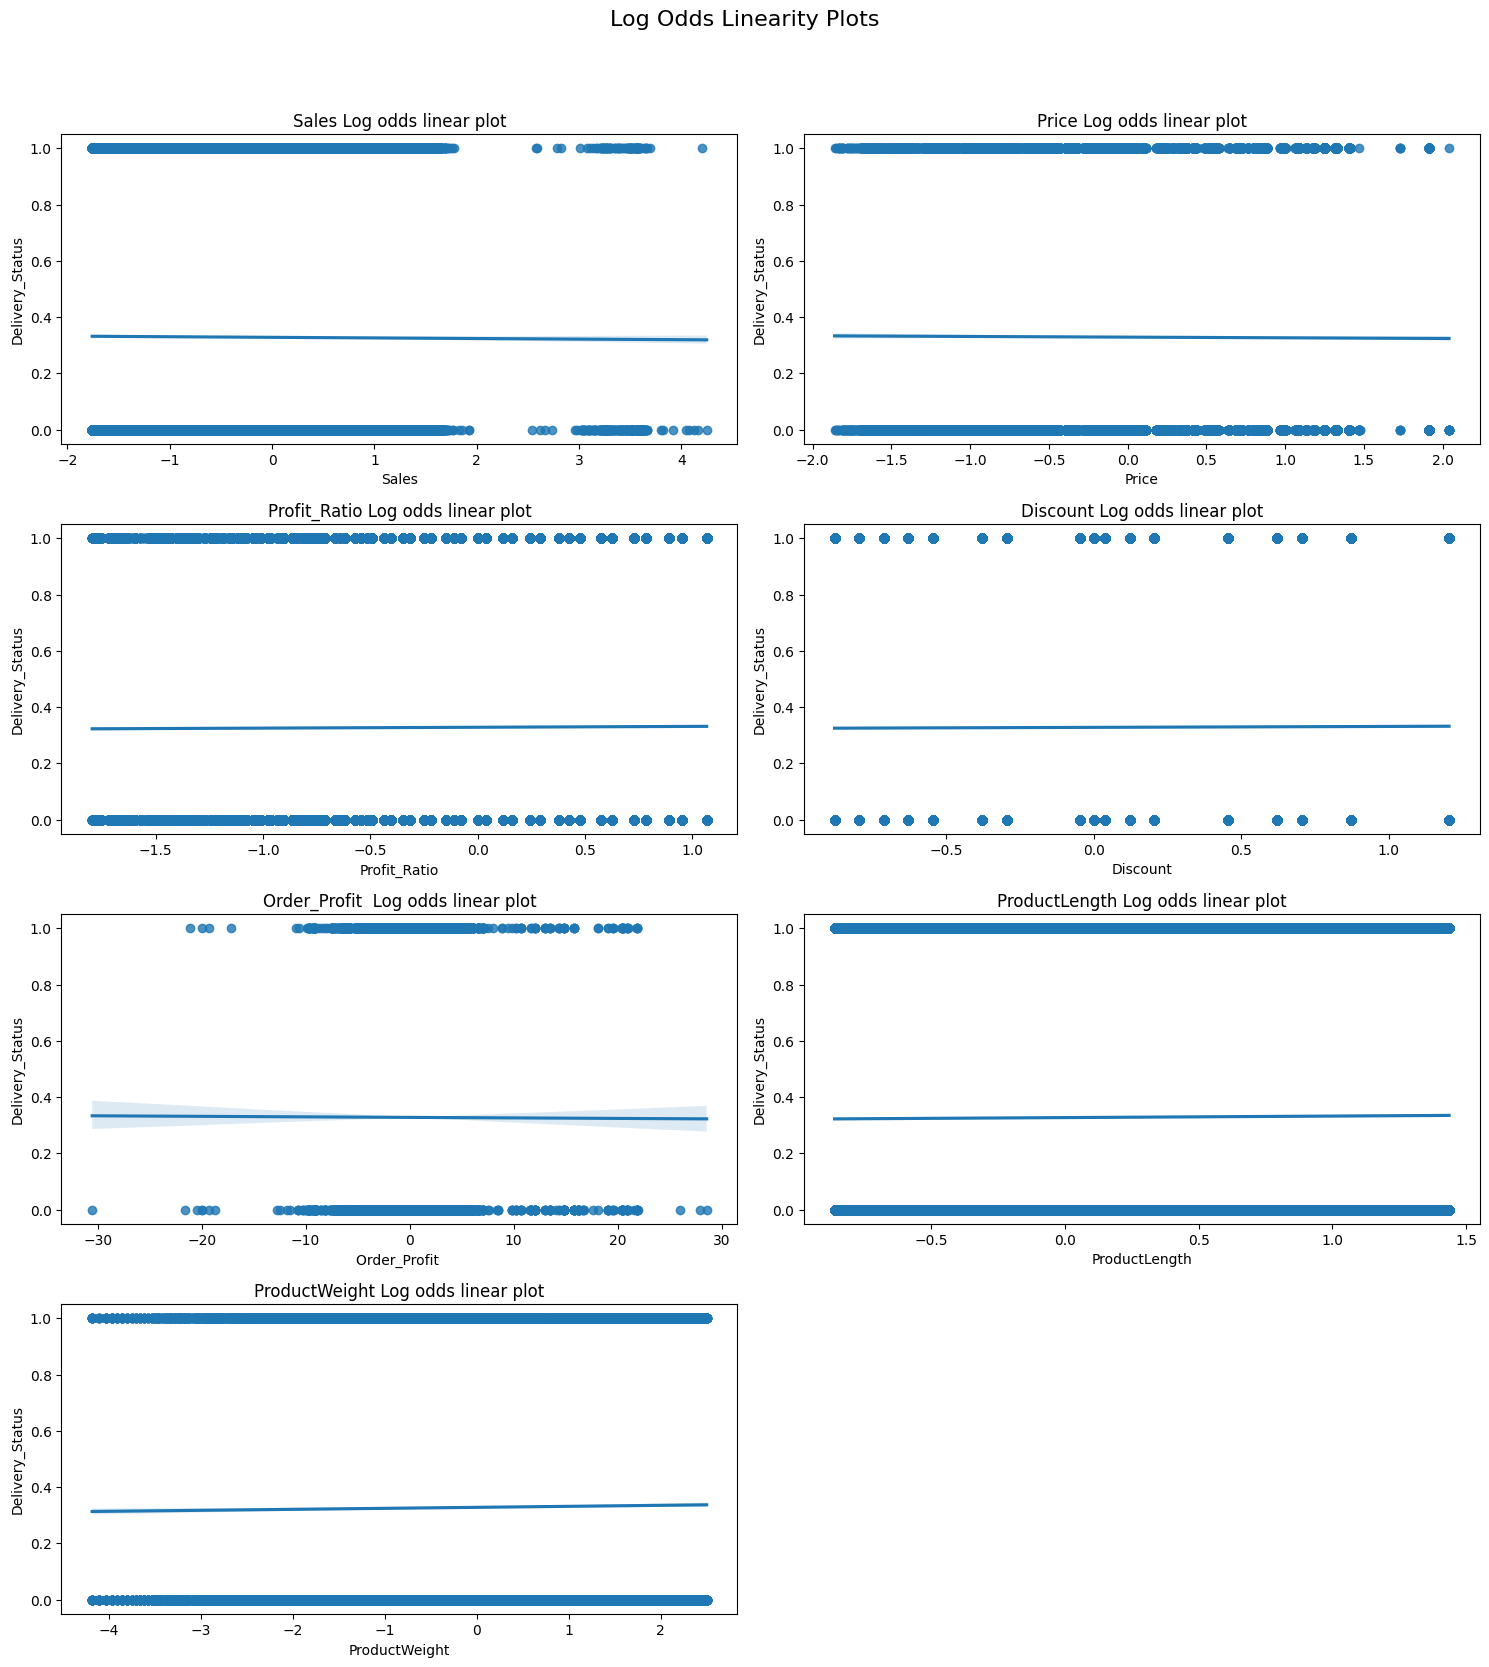

## Transformation

In [75]:
df2=df1.copy()

In [76]:
df2[num].skew()[(df2[num].skew()>0.5)|(df2[num].skew()<-0.5)]

Sales            2.793369
Price            3.171663
Profit_Ratio    -2.870356
Order_Profit    -4.946131
ProductWeight    3.575051
dtype: float64

In [77]:
to_transform=['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductWeight']

In [78]:
from sklearn.preprocessing import PowerTransformer
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

In [79]:
df2[to_transform] = yeo_johnson_transformer.fit_transform(df2[to_transform])

## Encoding

In [80]:
df3=df2.copy()

| Serial No. | Feature            | Unique Categories |
|------------|--------------------|-------------------|
| 1          | PRODUCT_TYPE       | 2                |
| 2          | DISPATCHED         | 2                |
| 3          | WEEKDAYORDER       | 2                |
| 4          | DELIVERY_STATUS    | 2                |
| 5          | CUSTOMER_CATEGORY  | 3                |
| 6          | SESSION_ORDERED    | 3                |
| 7          | SHIPPING_CLASS     | 4                |
| 8          | TRANSCATION        | 4                |
| 9          | ORDER_ZONE         | 5                |
| 10         | WAREHOUSE_REGION   | 5                |
| 11         | DELIVERY_REVIEW    | 5                |
| 12         | QUANTITY           | 5                |
| 13         | SCHEDULED_SHIPPING | 6                |
| 14         | DEPT_NAME          | 11               |
| 15         | CUST_STATE         | 18               |
| 16         | CATEGORYNAME       | 50               |

In [81]:
for i in cat:
    print(i)
    print(df3[i].nunique())
    print(df3[i].unique())
    print('*'*80)

Customer_Category
3
['Consumer' 'Corporate' 'others']
********************************************************************************
Cust_State
18
['AR' 'BR' 'RJ' 'UP' 'JK' 'MA' 'PB' 'HR' 'GJ' 'AP' 'KA' 'HP' 'OR' 'KL'
 'WB' 'TEL' 'UK' 'MP']
********************************************************************************
Order_zone
5
['Central' 'East' 'South' 'North' 'West']
********************************************************************************
CategoryName
50
['Cat-2' 'Cat-50' 'Cat-12' 'Cat-3' 'Cat-42' 'Cat-13' 'Cat-32' 'Cat-4'
 'Cat-36' 'Cat-34' 'Cat-49' 'Cat-19' 'Cat-38' 'Cat-25' 'Cat-7' 'Cat-5'
 'Cat-11' 'Cat-45' 'Cat-47' 'Cat-20' 'Cat-27' 'Cat-37' 'Cat-44' 'Cat-8'
 'Cat-21' 'Cat-30' 'Cat-40' 'Cat-15' 'Cat-9' 'Cat-41' 'Cat-6' 'Cat-39'
 'Cat-33' 'Cat-16' 'Cat-29' 'Cat-31' 'Cat-10' 'Cat-24' 'Cat-48' 'Cat-1'
 'Cat-23' 'Cat-18' 'Cat-14' 'Cat-28' 'Cat-22' 'Cat-46' 'Cat-26' 'Cat-35'
 'Cat-17' 'Cat-43']
***************************************************************************

#### One-Hot Endcoding

In [82]:
onehot_col = ["Customer_Category", "Transcation"]

In [83]:
df3 = pd.get_dummies(df3, columns=onehot_col, drop_first=True,dtype='int')

#### Ordinal Encoding

- **Standard (0)**: Basic level.
- **2A (1)**: Intermediate level, possibly faster than Standard.
- **1A (2)**: Higher priority, likely quicker than 2A.
- **Elite (3)**: The highest priority or most premium service.  

In [84]:
hierarchy = {'Standard': 0, '2A': 1, '1A': 2, 'Elite': 3}

In [85]:
df3['Shipping_Class'] = df3['Shipping_Class'].map(hierarchy)

#### Binary Encoding

In [86]:
df3['Product_type']=df3['Product_type'].replace({'Not Fragile':0,'Fragile':1})

## Base Model

In [87]:
df4=df3.copy()

In [88]:
df4['Delivery_Status']=df4['Delivery_Status'].astype('int')
df4['Quantity']=df4['Quantity'].astype('int')
df4['Dispatched']=df4['Dispatched'].astype('int')
df4['Scheduled_Shipping']=df4['Scheduled_Shipping'].astype('int')
df4['WeekdayOrder']=df4['WeekdayOrder'].astype('int')

In [89]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126363 entries, 0 to 126362
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Cust_State                   126363 non-null  object 
 1   Sales                        126363 non-null  float64
 2   Order_zone                   126363 non-null  object 
 3   Price                        126363 non-null  float64
 4   CategoryName                 126363 non-null  object 
 5   Dept_Name                    126363 non-null  object 
 6   Profit_Ratio                 126363 non-null  float64
 7   Discount                     126363 non-null  float64
 8   Quantity                     126363 non-null  int32  
 9   Order_Profit                 126363 non-null  float64
 10  Product_type                 126363 non-null  int64  
 11  ProductLength                126363 non-null  float64
 12  ProductWeight                126363 non-null  float64
 13 

In [90]:
X=df4.drop('Delivery_Status',axis=1)
y=df4['Delivery_Status']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [92]:
catboost_encoding = ['Cust_State', 'Order_zone', 'CategoryName', 'Dept_Name', 'Warehouse_Region']

In [93]:
catboost_encoder = CatBoostEncoder(cols=catboost_encoding)
X_train_encoded = catboost_encoder.fit_transform(X_train, y_train)
X_test_encoded = catboost_encoder.transform(X_test)

In [94]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [95]:
X_train_preprocessed = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_preprocessed = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [96]:
X_train_with_const = sm.add_constant(X_train_preprocessed)

In [97]:
logit = sm.Logit(y_train, X_train_with_const)
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.497912
         Iterations 6


In [98]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:        Delivery_Status   No. Observations:                88454
Model:                          Logit   Df Residuals:                    88428
Method:                           MLE   Df Model:                           25
Date:                Thu, 28 Nov 2024   Pseudo R-squ.:                  0.2131
Time:                        13:39:42   Log-Likelihood:                -44042.
converged:                       True   LL-Null:                       -55972.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.6607      0.041    -40.658      0.000      -1.741      -1.581
Cust_State                     -0.0075      0.005     -1.486      0.137      -0.

## Varaiation inflation factor

In [160]:
vif_df=df4.copy()

In [161]:
X = vif_df.drop('Delivery_Status', axis=1)
y = vif_df['Delivery_Status']

In [162]:
catboost_encoding = ['Cust_State', 'Order_zone', 'CategoryName', 'Dept_Name', 'Warehouse_Region']

In [163]:
catboost_encoder = CatBoostEncoder(cols=catboost_encoding)
X_encoded = catboost_encoder.fit_transform(X, y)

In [164]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [165]:
X_preprocessed = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [166]:
vif = []
for i in range(X_preprocessed.shape[1]):
    vif.append(variance_inflation_factor(X_preprocessed.values, i))

In [167]:
pd.DataFrame({'Feature': X_preprocessed.columns, 'VIF': vif}).sort_values(by='VIF', ascending=False)

Feature       VIF
3                         Price  6.518501
8                      Quantity  5.010909
1                         Sales  4.209870
23            Transcation_Debit  3.140778
24              Transcation_UPI  2.572009
22           Transcation_Credit  2.292593
9                 Order_Profit   2.205646
14               Shipping_Class  1.978116
19                 WeekdayOrder  1.903487
6                  Profit_Ratio  1.758780
10                 Product_type  1.727680
11                ProductLength  1.650872
12                ProductWeight  1.646820
13                   Dispatched  1.606076
20  Customer_Category_Corporate  1.537274
17              Delivery_Review  1.413333
15           Scheduled_Shipping  1.381131
21     Customer_Category_others  1.342095
5                     Dept_Name  1.286174
4                  CategoryName  1.270704
7                      Discount  1.054250
2                    Order_zone  1.024964
16             Warehouse_Region  1.021403
0                    Cust_State  1.007299
18              Session_Ordered  1.000181

1. The Variance Inflation Factor (VIF) values for all features are below the commonly used threshold of 5, indicating that there is no significant multicollinearity among the features.
2. With VIF values ranging from 1.000181 to 6.518501, the majority of features have VIF values close to 1, suggesting minimal multicollinearity in the dataset.

## Model building

In [130]:
score_card = pd.DataFrame(columns=['Model Name','Train Accuracy Score','Test Accuracy Score',
                                   'Precision','Recall','f1-weighted','ROC AUC score'])

In [230]:
def update_score_card(model_name, model, xtrain, xtest, ytrain, ytest):
    
    cat_col = ['Cust_State', 'Order_zone', 'CategoryName', 'Dept_Name', 'Warehouse_Region']
    catboost_encoding = [col for col in cat_col if col in xtrain.columns]
    
    encoder = CatBoostEncoder(cols=catboost_encoding)
    xtrain_encoded = encoder.fit_transform(xtrain, ytrain)
    xtest_encoded = encoder.transform(xtest)

    scaler = RobustScaler()
    xtrain_scaled = scaler.fit_transform(xtrain_encoded)
    xtest_scaled = scaler.transform(xtest_encoded)
    
    model.fit(xtrain_scaled, ytrain)
    y_pred_train = model.predict(xtrain_scaled)
    global y_pred_test
    y_pred_test = model.predict(xtest_scaled)
    
    global score_card
    score_card = pd.concat([score_card, pd.DataFrame({
        'Model Name': [model_name],
        'Train Accuracy Score': [accuracy_score(ytrain, y_pred_train)],
        'Test Accuracy Score': [accuracy_score(ytest, y_pred_test)],
        'Precision': [precision_score(ytest, y_pred_test)],
        'Recall': [recall_score(ytest, y_pred_test)],
        'f1-weighted': [f1_score(ytest, y_pred_test, average='weighted')],
        'ROC AUC score': [roc_auc_score(ytest, y_pred_test)]
    })], ignore_index=True)
    
    return score_card

In [132]:
X=df4.drop('Delivery_Status',axis=1)
y=df4['Delivery_Status']

In [133]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [134]:
lr=LogisticRegression(random_state=42)

In [135]:
update_score_card('Logistic regression',lr,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  Precision  \
0  Logistic regression              0.713162              0.71363   0.579531   

     Recall  f1-weighted  ROC AUC score  
0  0.462646     0.704289       0.649396

In [136]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80     25474
           1       0.58      0.46      0.51     12435

    accuracy                           0.71     37909
   macro avg       0.67      0.65      0.66     37909
weighted avg       0.70      0.71      0.70     37909



In [137]:
rf=RandomForestClassifier(random_state=42)

In [138]:
update_score_card('Random forest',rf,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  Precision  \
0  Logistic regression              0.713162             0.713630   0.579531   
1        Random forest              1.000000             0.734628   0.576029   

     Recall  f1-weighted  ROC AUC score  
0  0.462646     0.704289       0.649396  
1  0.723522     0.740842       0.731785

In [139]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79     25474
           1       0.58      0.72      0.64     12435

    accuracy                           0.73     37909
   macro avg       0.71      0.73      0.72     37909
weighted avg       0.76      0.73      0.74     37909



In [140]:
xgb=XGBClassifier(random_state=42)

In [141]:
update_score_card('Extreme Gradient Boosting ',xgb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802

In [142]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79     25474
           1       0.57      0.75      0.65     12435

    accuracy                           0.74     37909
   macro avg       0.72      0.74      0.72     37909
weighted avg       0.76      0.74      0.74     37909



In [143]:
cb=CatBoostClassifier(verbose=0)

In [144]:
update_score_card('Cat boost ',cb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   
3                  Cat boost               0.838108             0.742383   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408

In [145]:
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79     25474
           1       0.58      0.80      0.67     12435

    accuracy                           0.74     37909
   macro avg       0.73      0.76      0.73     37909
weighted avg       0.78      0.74      0.75     37909



In [146]:
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

In [147]:
update_score_card('Light Gradient Boosting  ',lgbm,xtrain,xtest,ytrain,ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   
3                  Cat boost               0.838108             0.742383   
4   Light Gradient Boosting                0.779309             0.744282   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408  
4   0.578051  0.816244     0.751828       0.762699

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn = KNeighborsClassifier()

In [150]:
update_score_card('KNN',knn,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   
3                  Cat boost               0.838108             0.742383   
4   Light Gradient Boosting                0.779309             0.744282   
5                       KNN                0.798211             0.697117   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408  
4   0.578051  0.816244     0.751828       0.762699  
5   0.546997  0.445999     0.688244       0.632849

In [151]:
from sklearn.naive_bayes import GaussianNB

In [152]:
gnb = GaussianNB()

In [153]:
update_score_card('GaussianNB',gnb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   
3                  Cat boost               0.838108             0.742383   
4   Light Gradient Boosting                0.779309             0.744282   
5                       KNN                0.798211             0.697117   
6                  GaussianNB              0.704830             0.707748   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408  
4   0.578051  0.816244     0.751828       0.762699  
5   0.546997  0.445999     0.688244       0.632849  
6   0.592953  0.347809     0.683063       0.615629

In [154]:
from sklearn.ensemble import AdaBoostClassifier

In [155]:
abc = AdaBoostClassifier()

In [156]:
update_score_card('Adaboost',abc,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   
3                  Cat boost               0.838108             0.742383   
4   Light Gradient Boosting                0.779309             0.744282   
5                       KNN                0.798211             0.697117   
6                  GaussianNB              0.704830             0.707748   
7                    Adaboost              0.710629             0.706824   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408  
4   0.578051  0.816244     0.751828       0.762699  
5   0.546997  0.445999     0.688244       0.632849  
6   0.592953  0.347809     0.683063       0.615629  
7   0.580854  0.381584     0.687799       0.623586

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt = DecisionTreeClassifier(random_state=42)

In [159]:
update_score_card('Decision tree',dt,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0         Logistic regression              0.713162             0.713630   
1               Random forest              1.000000             0.734628   
2  Extreme Gradient Boosting               0.846519             0.735815   
3                  Cat boost               0.838108             0.742383   
4   Light Gradient Boosting                0.779309             0.744282   
5                       KNN                0.798211             0.697117   
6                  GaussianNB              0.704830             0.707748   
7                    Adaboost              0.710629             0.706824   
8               Decision tree              1.000000             0.716584   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408  
4   0.578051  0.816244     0.751828       0.762699  
5   0.546997  0.445999     0.688244       0.632849  
6   0.592953  0.347809     0.683063       0.615629  
7   0.580854  0.381584     0.687799       0.623586  
8   0.568958  0.560997     0.716068       0.676765

## Feature Selection

### Feature importance

In [168]:
rf.feature_importances_

array([0.05226172, 0.04846758, 0.05129529, 0.04935247, 0.05128234,
       0.05019766, 0.03768922, 0.0336459 , 0.01241314, 0.04834693,
       0.00641609, 0.04798604, 0.05167926, 0.00708168, 0.14150894,
       0.19872344, 0.05174256, 0.01651012, 0.01274269, 0.00753147,
       0.00678343, 0.00557511, 0.00358403, 0.00359845, 0.00358443])

In [169]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances

Feature  Importance
15           Scheduled_Shipping    0.198723
14               Shipping_Class    0.141509
0                    Cust_State    0.052262
16             Warehouse_Region    0.051743
12                ProductWeight    0.051679
2                    Order_zone    0.051295
4                  CategoryName    0.051282
5                     Dept_Name    0.050198
3                         Price    0.049352
1                         Sales    0.048468
9                 Order_Profit     0.048347
11                ProductLength    0.047986
6                  Profit_Ratio    0.037689
7                      Discount    0.033646
17              Delivery_Review    0.016510
18              Session_Ordered    0.012743
8                      Quantity    0.012413
19                 WeekdayOrder    0.007531
13                   Dispatched    0.007082
20  Customer_Category_Corporate    0.006783
10                 Product_type    0.006416
21     Customer_Category_others    0.005575
23            Transcation_Debit    0.003598
24              Transcation_UPI    0.003584
22           Transcation_Credit    0.003584

In [170]:
top_10_features = feature_importances.head(10)
top_10_features

Feature  Importance
15  Scheduled_Shipping    0.198723
14      Shipping_Class    0.141509
0           Cust_State    0.052262
16    Warehouse_Region    0.051743
12       ProductWeight    0.051679
2           Order_zone    0.051295
4         CategoryName    0.051282
5            Dept_Name    0.050198
3                Price    0.049352
1                Sales    0.048468

In [171]:
sel_feat=top_10_features['Feature'].to_list()

In [172]:
X=df4[sel_feat]
y=df4['Delivery_Status']

In [173]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=42,stratify=y)

In [174]:
update_score_card('Logistic regression featimp',lr,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0          Logistic regression              0.713162             0.713630   
1                Random forest              1.000000             0.734628   
2   Extreme Gradient Boosting               0.846519             0.735815   
3                   Cat boost               0.838108             0.742383   
4    Light Gradient Boosting                0.779309             0.744282   
5                        KNN                0.798211             0.697117   
6                   GaussianNB              0.704830             0.707748   
7                     Adaboost              0.710629             0.706824   
8                Decision tree              1.000000             0.716584   
9  Logistic regression featimp              0.713116             0.712944   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.579531  0.462646     0.704289       0.649396  
1   0.576029  0.723522     0.740842       0.731785  
2   0.574830  0.747487     0.742612       0.738802  
3   0.577782  0.797185     0.749779       0.756408  
4   0.578051  0.816244     0.751828       0.762699  
5   0.546997  0.445999     0.688244       0.632849  
6   0.592953  0.347809     0.683063       0.615629  
7   0.580854  0.381584     0.687799       0.623586  
8   0.568958  0.560997     0.716068       0.676765  
9   0.574285  0.482750     0.705890       0.654031

In [175]:
update_score_card('Random forest featimp',rf,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  Test Accuracy Score  \
0           Logistic regression              0.713162             0.713630   
1                 Random forest              1.000000             0.734628   
2    Extreme Gradient Boosting               0.846519             0.735815   
3                    Cat boost               0.838108             0.742383   
4     Light Gradient Boosting                0.779309             0.744282   
5                         KNN                0.798211             0.697117   
6                    GaussianNB              0.704830             0.707748   
7                      Adaboost              0.710629             0.706824   
8                 Decision tree              1.000000             0.716584   
9   Logistic regression featimp              0.713116             0.712944   
10                Random forest              1.000000             0.731198   

    Precision    Recall  f1-weighted  ROC AUC score  
0    0.579531  0.462646     0.704289       0.649396  
1    0.576029  0.723522     0.740842       0.731785  
2    0.574830  0.747487     0.742612       0.738802  
3    0.577782  0.797185     0.749779       0.756408  
4    0.578051  0.816244     0.751828       0.762699  
5    0.546997  0.445999     0.688244       0.632849  
6    0.592953  0.347809     0.683063       0.615629  
7    0.580854  0.381584     0.687799       0.623586  
8    0.568958  0.560997     0.716068       0.676765  
9    0.574285  0.482750     0.705890       0.654031  
10   0.567812  0.755850     0.738473       0.737508

In [176]:
update_score_card('Extreme Gradient Boosting featimp',xgb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794

In [177]:
update_score_card('Cat boost featimp',cb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045

In [178]:
update_score_card('Light Gradient Boosting featimp ',lgbm,xtrain,xtest,ytrain,ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2050
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100

In [179]:
update_score_card('KNN featimp',knn,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368

In [180]:
update_score_card('GaussianNB featimp',gnb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044

In [181]:
update_score_card('Adaboost featimp',abc,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755

In [182]:
update_score_card('Decision tree featimp',dt,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822

### Recursive Feature Elimination (RFE)

In [187]:
rfe_df=df4.copy()

In [188]:
X=rfe_df.drop('Delivery_Status',axis=1)
y=rfe_df['Delivery_Status']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [190]:
catboost_encoding = ['Cust_State', 'Order_zone', 'CategoryName', 'Dept_Name', 'Warehouse_Region']
catboost_encoder = CatBoostEncoder(cols=catboost_encoding)

In [191]:
X_train_encoded = catboost_encoder.fit_transform(X_train, y_train)
X_test_encoded = catboost_encoder.transform(X_test)

In [192]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [193]:
X_train_preprocessed = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_preprocessed = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [195]:
from sklearn.feature_selection import RFE

In [194]:
rfe = RFE(estimator=lgbm, n_features_to_select=10, step=1)

In [196]:
rfe.fit(X_train_preprocessed, y_train)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2679
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2670
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

RFE(estimator=LGBMClassifier(max_depth=6, random_state=42),
    n_features_to_select=10)

In [198]:
selected_features = X_train_preprocessed.columns[rfe.support_]
selected_features

Index(['Cust_State', 'Sales', 'Order_zone', 'Price', 'CategoryName',
       'Dept_Name', 'Order_Profit ', 'ProductLength', 'ProductWeight',
       'Warehouse_Region'],
      dtype='object')

In [203]:
X=df4[selected_features]
y=df4['Delivery_Status']

In [204]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=42,stratify=y)

In [205]:
update_score_card('Light Gradient Boosting rfe',lgbm,xtrain,xtest,ytrain,ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009980 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2497
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061

In [206]:
update_score_card('Cat boost rfe',cb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762

In [207]:
update_score_card('Logistic regression rfe',lr,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000

In [208]:
update_score_card('Random forest rfe',rf,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161

In [209]:
update_score_card('Extreme Gradient Boosting rfe',xgb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785

In [210]:
update_score_card('Adaboost rfe',abc,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982

In [211]:
update_score_card('Decision tree rfe',dt,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234

### Forward feature selection

In [212]:
forward=SequentialFeatureSelector(estimator=lgbm,direction='forward',scoring='f1',n_features_to_select='auto',cv=4)

In [213]:
forward.fit(X_train_preprocessed, y_train)

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 202
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.32803

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.71

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000951 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 208
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 66341, number

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 265
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001065 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 270
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66340, numbe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 151
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 272
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001963 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 27
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 277
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 158
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 41
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 226
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 279
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 26
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 31
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 228
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosi

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 281
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 28
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 233
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003402 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 167
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 66341, numbe

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 235
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 288
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 37
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

SequentialFeatureSelector(cv=4,
                          estimator=LGBMClassifier(max_depth=6,
                                                   random_state=42),
                          scoring='f1')

In [220]:
sel_feat=X_train_preprocessed.columns[forward.get_support()].to_list()
sel_feat

['Price',
 'Quantity',
 'Product_type',
 'Dispatched',
 'Shipping_Class',
 'Scheduled_Shipping',
 'Delivery_Review',
 'Session_Ordered',
 'WeekdayOrder',
 'Customer_Category_Corporate',
 'Customer_Category_others',
 'Transcation_Credit']

In [225]:
X=df4[sel_feat]
y=df4['Delivery_Status']

In [226]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=42,stratify=y)

In [231]:
update_score_card('Logistic regression forward',lr,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234  
25             0.712944   0.574285  0.482750     0.705890       0.654031

In [232]:
update_score_card('Random forest forward',rf,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234  
25             0.712944   0.574285  0.482750     0.705890       0.654031  
26             0.716611   0.565047  0.590993     0.718185       0.684462

In [233]:
update_score_card('Extreme Gradient Boosting forward',xgb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234  
25             0.712944   0.574285  0.482750     0.705890       0.654031  
26             0.716611   0.565047  0.590993     0.718185       0.684462  
27             0.732465   0.567295  0.777242     0.740069       0.743924

In [234]:
update_score_card('Cat boost forward',cb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234  
25             0.712944   0.574285  0.482750     0.705890       0.654031  
26             0.716611   0.565047  0.590993     0.718185       0.684462  
27             0.732465   0.567295  

In [235]:
update_score_card('Light Gradient Boosting forward ',lgbm,xtrain,xtest,ytrain,ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234  
25             0.712944   0.574285  0.482750     0.705890       0.654031  
26             0.716611   0.565047  0.590993    

In [236]:
update_score_card('KNN forward',knn,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   
30                        KNN forward              0.818878   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234  
25             0.712944   0.574285  0.482750     0.705890   

In [237]:
update_score_card('GaussianNB forward',gnb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   
30                        KNN forward              0.818878   
31                 GaussianNB forward              0.679562   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24             0.556280   0.325676  0.329473     0.556932       0.498234

In [238]:
update_score_card('Adaboost forward',abc,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   
30                        KNN forward              0.818878   
31                 GaussianNB forward              0.679562   
32                   Adaboost forward              0.701449   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.671898   0.285714  0.000161     0.540203       0.499982  
24       

In [239]:
update_score_card('Decision tree forward',dt,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   
30                        KNN forward              0.818878   
31                 GaussianNB forward              0.679562   
32                   Adaboost forward              0.701449   
33              Decision tree forward              0.999977   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.321083  0.013349     0.545490       0.499785  
23             0.6718

### Backward feature selection

In [240]:
backward=SequentialFeatureSelector(estimator=lgbm,direction='backward',scoring='f1',n_features_to_select='auto',cv=4)

In [241]:
backward.fit(X_train_preprocessed,ytrain)

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2670
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2485
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013714 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2432
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005472 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010464 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 66340, numb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2684
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021273 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 66340, numb

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2551
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2683
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021016 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2430
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2680
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020049 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2682
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2683
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011317 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2428
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2428
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2549
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007842 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2481
[LightGBM] [Info] Number of data points in the train set: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2679
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2428
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2678
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2681
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2173
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003354 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2173
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2294
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2411
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2423
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2173
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003164 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2173
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 66341, numb

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2173
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2423
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2425
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008228 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2426
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2224
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2422
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2171
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2421
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2423
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2424
[LightGBM] [Info] Number of data points in the train set: 66341, numb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2290
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020775 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2407
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2419
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011533 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2422
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2222
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2422
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2420
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2169
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2421
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2164
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008847 seconds.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2164
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2285
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2164
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2217
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2413
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2413
[LightGBM] [Info] Number of data poi

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2164
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2417
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.3

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2162
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2412
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2415
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2413
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2415
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2210
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training fr

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1960
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015488 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2213
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006779 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2213
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2211
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2209
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2212
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2213
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007250 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1826
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1943
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1955
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1954
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003888 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1571
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1688
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1700
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1703
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 66340, numb

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1703
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1699
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1450
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1702
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002942 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1316
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006125 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1446
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0.717098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44579
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 66341, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328032 -> initscore=-0.717098
[LightGBM] [Info] Start training from score -0

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 21762, number of negative: 44578
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1448
[LightGBM] [Info] Number of data points in the train set: 66340, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328037 -> initscore=-0.717075
[LightGBM] [Info] Start training from score -0.717075
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

SequentialFeatureSelector(cv=4, direction='backward',
                          estimator=LGBMClassifier(max_depth=6,
                                                   random_state=42),
                          scoring='f1')

In [244]:
sel_feat_back=X_train_preprocessed.columns[backward.get_support()].to_list()
sel_feat_back

['Sales',
 'Price',
 'Profit_Ratio',
 'Discount',
 'Quantity',
 'Order_Profit ',
 'Product_type',
 'Dispatched',
 'Shipping_Class',
 'Scheduled_Shipping',
 'Warehouse_Region',
 'Session_Ordered',
 'WeekdayOrder']

In [245]:
X=df4[sel_feat_back]
y=df4['Delivery_Status']

In [246]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.30,random_state=42,stratify=y)

In [247]:
update_score_card('Logistic regression backward',lr,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   
30                        KNN forward              0.818878   
31                 GaussianNB forward              0.679562   
32                   Adaboost forward              0.701449   
33              Decision tree forward              0.999977   
34       Logistic regression backward              0.713105   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916     0.543187       0.500161  
22             0.667098   0.32108

In [248]:
update_score_card('Random forest backward',rf,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                 Logistic regression              0.713162   
1                       Random forest              1.000000   
2          Extreme Gradient Boosting               0.846519   
3                          Cat boost               0.838108   
4           Light Gradient Boosting                0.779309   
5                               KNN                0.798211   
6                          GaussianNB              0.704830   
7                            Adaboost              0.710629   
8                       Decision tree              1.000000   
9         Logistic regression featimp              0.713116   
10                      Random forest              1.000000   
11  Extreme Gradient Boosting featimp              0.831811   
12                  Cat boost featimp              0.815565   
13   Light Gradient Boosting featimp               0.766070   
14                        KNN featimp              0.810783   
15                 GaussianNB featimp              0.693445   
16                   Adaboost featimp              0.702919   
17              Decision tree featimp              1.000000   
18        Light Gradient Boosting rfe              0.674204   
19                      Cat boost rfe              0.688629   
20            Logistic regression rfe              0.671965   
21                  Random forest rfe              1.000000   
22      Extreme Gradient Boosting rfe              0.709386   
23                       Adaboost rfe              0.672203   
24                  Decision tree rfe              1.000000   
25        Logistic regression forward              0.713083   
26              Random forest forward              0.999966   
27  Extreme Gradient Boosting forward              0.793384   
28                  Cat boost forward              0.785131   
29   Light Gradient Boosting forward               0.754109   
30                        KNN forward              0.818878   
31                 GaussianNB forward              0.679562   
32                   Adaboost forward              0.701449   
33              Decision tree forward              0.999977   
34       Logistic regression backward              0.713105   
35             Random forest backward              1.000000   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671978   0.000000  0.000000     0.540144       0.500000  
21             0.669815   0.338583  0.006916 

In [249]:
update_score_card('Extreme Gradient Boosting backward',xgb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268657  0.001448     0.540620       0.499762  
20             0.671

In [250]:
update_score_card('Cat boost backward',cb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.000161     0.540253       0.500061  
19             0.671160   0.268

In [251]:
update_score_card('Light Gradient Boosting backward ',lgbm,xtrain,xtest,ytrain,ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.717260       0.684822  
18             0.672004   0.666667  0.0001

In [252]:
update_score_card('KNN backward',knn,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       0.607755  
17             0.715186   0.562055  0.596542     0.71

In [253]:
update_score_card('GaussianNB backward',gnb,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  
16             0.700124   0.572398  0.339204     0.675329       

In [254]:
update_score_card('Adaboost backward',abc,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15             0.698251   0.568107  0.334057     0.672894       0.605044  


In [255]:
update_score_card('Decision tree backward',dt,xtrain,xtest,ytrain,ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.711863   0.558879  0.577081     0.713017       0.677368  
15         

## Class Weights

In [256]:
lgbm = LGBMClassifier(random_state=42, class_weight='balanced')

In [257]:
update_score_card('Light Gradient Boosting balanced ',lgbm,xtrain,xtest,ytrain,ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1195
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.567622  0.904544     0.750321       0.784100  
14             0.71186

In [260]:
from imblearn.over_sampling import SMOTE

In [262]:
smote = SMOTE(random_state=42)
xtrain_resampled, ytrain_resampled = smote.fit_resample(X_train_preprocessed, ytrain)

In [263]:
print("Before SMOTE:", ytrain.value_counts())
print("After SMOTE:", pd.Series(ytrain_resampled).value_counts())

Before SMOTE: Delivery_Status
0    59438
1    29016
Name: count, dtype: int64
After SMOTE: Delivery_Status
1    59438
0    59438
Name: count, dtype: int64


In [265]:
lgbm = LGBMClassifier(random_state=42)

In [266]:
update_score_card('Light Gradient Boosting SMOTE', lgbm, xtrain_resampled, X_test_preprocessed, ytrain_resampled, ytest)

[LightGBM] [Info] Number of positive: 59438, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5209
[LightGBM] [Info] Number of data points in the train set: 118876, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579     0.749273       0.777045  
13             0.742673   0.56762

In [267]:
update_score_card('Random forest SMOTE', rf, xtrain_resampled, X_test_preprocessed, ytrain_resampled, ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.743647       0.756794  
12             0.741433   0.568329  0.880579

In [268]:
update_score_card('Xgboost SMOTE', xgb, xtrain_resampled, X_test_preprocessed, ytrain_resampled, ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.737508  
11             0.735709   0.567373  0.818094     0.7436

In [269]:
update_score_card('Catboost SMOTE', cb, xtrain_resampled, X_test_preprocessed, ytrain_resampled, ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   
47                      Catboost SMOTE              0.866945   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10             0.731198   0.567812  0.755850     0.738473       0.

In [274]:
lgbm = LGBMClassifier(random_state=42)

In [276]:
X=df4.drop('Delivery_Status',axis=1)
y=df4['Delivery_Status']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [278]:
catboost_encoding = ['Cust_State', 'Order_zone', 'CategoryName', 'Dept_Name', 'Warehouse_Region']

In [279]:
catboost_encoder = CatBoostEncoder(cols=catboost_encoding)
X_train_encoded = catboost_encoder.fit_transform(X_train, y_train)
X_test_encoded = catboost_encoder.transform(X_test)

In [280]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [281]:
X_train_preprocessed = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_preprocessed = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [288]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500],
    'num_leaves': [15, 31, 45, 63]
}

In [289]:
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='accuracy',  
    cv=3,  
    verbose=2,
    n_jobs=-1
)

In [290]:
grid_search.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300, 500],
                         'num_leaves': [15, 31, 45, 63]},
             scoring='accuracy', verbose=2)

In [291]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 63}
Best Cross-Validation Accuracy: 0.7455400422549444


In [292]:
best_params = {'learning_rate': 0.01, 'n_estimators': 500, 'num_leaves': 63}

In [293]:
lgbm = LGBMClassifier(**best_params, random_state=42)

In [294]:
update_score_card('Light Gradient Boosting Tuned', lgbm, xtrain_resampled, X_test_preprocessed, ytrain_resampled, ytest)

[LightGBM] [Info] Number of positive: 59438, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5209
[LightGBM] [Info] Number of data points in the train set: 118876, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   
47                      Catboost SMOTE              0.866945   
48       Light Gradient Boosting Tuned              0.826702   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9              0.712944   0.574285  0.482750     0.705890       0.654031  
10

In [296]:
catboost = CatBoostClassifier(silent=True, random_state=42)

In [297]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  
    'iterations': [200, 500],             
    'depth': [3, 5, 7],                   
    'l2_leaf_reg': [1, 3, 5]              
}

In [298]:
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  
    verbose=1,
    n_jobs=-1)

In [299]:
grid_search.fit(X_train_preprocessed, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001AE6AD926D0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 7], 'iterations': [200, 500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy', verbose=1)

In [300]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best Cross-Validation Accuracy: 0.7432111445611719


In [301]:
best_params = {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [302]:
catboost = CatBoostClassifier(**best_params,silent=True, random_state=42)

In [303]:
update_score_card('Catboost Tuned', catboost, xtrain_resampled, X_test_preprocessed, ytrain_resampled, ytest)

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   
47                      Catboost SMOTE              0.866945   
48       Light Gradient Boosting Tuned              0.826702   
49                      Catboost Tuned              0.812544   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584   0.568958  0.560997     0.716068       0.676765  
9            

In [305]:
X=df4.drop('Delivery_Status',axis=1)
y=df4['Delivery_Status']

In [306]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [307]:
lgbm = LGBMClassifier(**best_params, random_state=42)

In [308]:
update_score_card('Lgbm base Tuned', lgbm, xtrain, xtest, ytrain, ytest)

[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: l2_leaf_reg
[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Warning] Unknown parameter: depth
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: l2_leaf

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   
47                      Catboost SMOTE              0.866945   
48                    Lgbm SMOTE Tuned              0.826702   
49                Catboost SMOTE Tuned              0.812544   
50                     Lgbm base Tuned              0.792909   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854  0.381584     0.687799       0.623586  
8              0.716584 

In [311]:
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('cat', CatBoostClassifier(verbose=0)),
    ('lgbm', LGBMClassifier()) ]

In [312]:
meta_model = LogisticRegression()

In [315]:
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [316]:
update_score_card('Stacking', stacked_model, xtrain, xtest, ytrain, ytest)

[LightGBM] [Info] Number of positive: 29016, number of negative: 59438
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 88454, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328035 -> initscore=-0.717086
[LightGBM] [Info] Start training from score -0.717086
[LightGBM] [Info] Number of positive: 23212, number of negative: 47551
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2687
[LightGBM] [Info] Number of data points in the train set: 70763, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328025 -> initscore=-0.717133
[L

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   
47                      Catboost SMOTE              0.866945   
48                    Lgbm SMOTE Tuned              0.826702   
49                Catboost SMOTE Tuned              0.812544   
50                     Lgbm base Tuned              0.792909   
51                            Stacking              0.996394   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854 

In [317]:
top_models = score_card.sort_values(by='Test Accuracy Score', ascending=False).head(5).reset_index(drop=True)
top_models

Model Name  Train Accuracy Score  Test Accuracy Score  \
0               Lgbm SMOTE Tuned              0.826702             0.746393   
1                Lgbm base Tuned              0.792909             0.746023   
2      Light Gradient Boosting                0.779309             0.744282   
3                       Stacking              0.996394             0.744230   
4  Light Gradient Boosting SMOTE              0.828813             0.744203   

   Precision    Recall  f1-weighted  ROC AUC score  
0   0.569438  0.930197     0.753703       0.793433  
1   0.579758  0.820426     0.753534       0.765065  
2   0.578051  0.816244     0.751828       0.762699  
3   0.594703  0.691596     0.748567       0.730759  
4   0.569997  0.896502     0.751891       0.783181

In [323]:
score_card

Model Name  Train Accuracy Score  \
0                  Logistic regression              0.713162   
1                        Random forest              1.000000   
2           Extreme Gradient Boosting               0.846519   
3                           Cat boost               0.838108   
4            Light Gradient Boosting                0.779309   
5                                KNN                0.798211   
6                           GaussianNB              0.704830   
7                             Adaboost              0.710629   
8                        Decision tree              1.000000   
9          Logistic regression featimp              0.713116   
10                       Random forest              1.000000   
11   Extreme Gradient Boosting featimp              0.831811   
12                   Cat boost featimp              0.815565   
13    Light Gradient Boosting featimp               0.766070   
14                         KNN featimp              0.810783   
15                  GaussianNB featimp              0.693445   
16                    Adaboost featimp              0.702919   
17               Decision tree featimp              1.000000   
18         Light Gradient Boosting rfe              0.674204   
19                       Cat boost rfe              0.688629   
20             Logistic regression rfe              0.671965   
21                   Random forest rfe              1.000000   
22       Extreme Gradient Boosting rfe              0.709386   
23                        Adaboost rfe              0.672203   
24                   Decision tree rfe              1.000000   
25         Logistic regression forward              0.713083   
26               Random forest forward              0.999966   
27   Extreme Gradient Boosting forward              0.793384   
28                   Cat boost forward              0.785131   
29    Light Gradient Boosting forward               0.754109   
30                         KNN forward              0.818878   
31                  GaussianNB forward              0.679562   
32                    Adaboost forward              0.701449   
33               Decision tree forward              0.999977   
34        Logistic regression backward              0.713105   
35              Random forest backward              1.000000   
36  Extreme Gradient Boosting backward              0.815113   
37                  Cat boost backward              0.809121   
38   Light Gradient Boosting backward               0.762498   
39                        KNN backward              0.817691   
40                 GaussianNB backward              0.682841   
41                   Adaboost backward              0.702354   
42              Decision tree backward              1.000000   
43   Light Gradient Boosting balanced               0.744161   
44       Light Gradient Boosting SMOTE              0.828813   
45                 Random forest SMOTE              1.000000   
46                       Xgboost SMOTE              0.857566   
47                      Catboost SMOTE              0.866945   
48                    Lgbm SMOTE Tuned              0.826702   
49                Catboost SMOTE Tuned              0.812544   
50                     Lgbm base Tuned              0.792909   
51                            Stacking              0.996394   

    Test Accuracy Score  Precision    Recall  f1-weighted  ROC AUC score  
0              0.713630   0.579531  0.462646     0.704289       0.649396  
1              0.734628   0.576029  0.723522     0.740842       0.731785  
2              0.735815   0.574830  0.747487     0.742612       0.738802  
3              0.742383   0.577782  0.797185     0.749779       0.756408  
4              0.744282   0.578051  0.816244     0.751828       0.762699  
5              0.697117   0.546997  0.445999     0.688244       0.632849  
6              0.707748   0.592953  0.347809     0.683063       0.615629  
7              0.706824   0.580854 